In [32]:
import pandas as pd
import numpy as np

# LABORATORIO 1 - Series de Tiempo
## Análisis de consumo y precios de hidrocarburos

### 1. Análisis exploratorio

#### 1.1 Datos de consumo

In [33]:
consumos_2024 = pd.read_excel("consumo2024.xlsx", skiprows=6)
consumos_2025 = pd.read_excel("consumo2025.xlsx", skiprows=6)

consumos_2024.head(5)

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gas natural,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,2001-01-01,0.0,30002.215,399107.633016,0.0,0.0,0.0,0.0,179405.990278,NaN,...,69691.250833,0.0,0.0,0.0,0.0,0.0,0,569328.787024,0,1.714082e+06
1,2001-02-01,0.0,34407.565,404897.003492,0.0,0.0,0.0,0.0,167818.137897,NaN,...,56326.420833,0.0,0.0,0.0,0.0,0.0,0,597749.831786,0,1.739032e+06
2,2001-03-01,0.0,32274.675,406269.275397,0.0,0.0,0.0,0.0,186397.325992,NaN,...,68208.990833,0.0,0.0,0.0,0.0,0.0,0,736085.973214,0,1.988404e+06
3,2001-04-01,0.0,26986.955,397689.219683,0.0,0.0,0.0,0.0,175820.345040,NaN,...,66697.900833,0.0,0.0,0.0,0.0,0.0,0,606257.658929,0,1.829318e+06
4,2001-05-01,0.0,29776.715,494837.728254,0.0,0.0,0.0,0.0,178303.330754,NaN,...,61641.630833,0.0,0.0,0.0,0.0,0.0,0,664082.657500,0,1.948460e+06


In [34]:
consumos_2025.head(5)

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,Gasolina regular,Gasolina superior,Grasas lubricantes,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Total
0,2025-01-01,32041.96,168.80,101775.82,NaN,92410.45,1399798.38,4727.57,581794.25,NaN,828269.64,702319.64,1262.97,5791.72,37.92,399627.73,3522,13514.52,4167063.37
1,2025-02-01,28268.31,4023.03,101948.38,388.64,74719.98,1343721.50,83598.78,586541.02,165.78,781113.92,651035.74,341.41,3889.33,46.82,463740.46,2857,4392.28,4130792.38
2,2025-03-01,26721.06,8101.52,124247.01,425.03,85437.34,1456533.00,7719.40,589796.81,1495.19,895068.46,763939.48,8375.63,6318.02,0.67,517139.87,2022,14447.11,4507787.60
3,2025-04-01,29802.90,5792.94,138234.27,NaN,79483.45,1384488.46,41289.93,581405.92,944.92,878741.74,746081.22,209.25,8090.31,37.24,509893.47,3560,11923.71,4419979.73
4,2025-05-01,32191.74,12300.84,160453.73,NaN,81903.71,1416602.71,5696.57,594599.75,NaN,893158.40,761100.59,618.95,8021.11,0.54,537273.51,2163,11664.74,4517749.89


In [35]:
# Concantenar datos de 2024 y 2025
consumos = pd.concat([consumos_2024, consumos_2025], ignore_index=True)
 # Dejar unicamente las columnas de interés
consumos = consumos[['Fecha', 'Diesel bajo azufre',	'Gas licuado de petróleo', 'Gasolina regular', 'Gasolina superior' ]]

consumos 

,Fecha,Diesel bajo azufre,Gas licuado de petróleo,Gasolina regular,Gasolina superior
0,2001-01-01,0.00,179405.990278,164547.351667,300242.781667
1,2001-02-01,0.00,167818.137897,174838.811667,301483.401667
2,2001-03-01,0.00,186397.325992,201992.651667,355572.831667
3,2001-04-01,0.00,175820.345040,198683.391667,355826.761667
4,2001-05-01,0.00,178303.330754,182504.091667,336040.041667
...,...,...,...,...,...
288,2025-01-01,1399798.38,581794.250000,828269.640000,702319.640000
289,2025-02-01,1343721.50,586541.020000,781113.920000,651035.740000
290,2025-03-01,1456533.00,589796.810000,895068.460000,763939.480000
291,2025-04-01,1384488.46,581405.920000,878741.740000,746081.220000


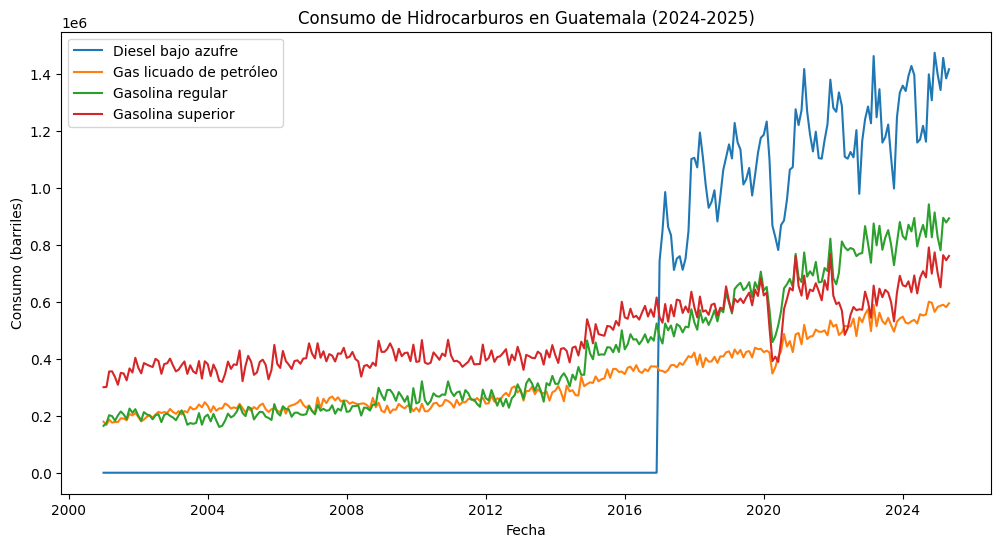

In [36]:
# Graficar los datos de consumo
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for column in consumos.columns[1:]:
    plt.plot(consumos['Fecha'], consumos[column], label=column)
plt.title("Consumo de Hidrocarburos en Guatemala (2024-2025)")
plt.xlabel("Fecha")
plt.ylabel("Consumo (barriles)")
plt.legend()
plt.show()

Parece observarse una tendencia general hacia arriba, y cierto comportamiento cíclico también. Podemos notar como en 2020 hay un declive importante, que podemos explicar por la pandemia del COVID-19

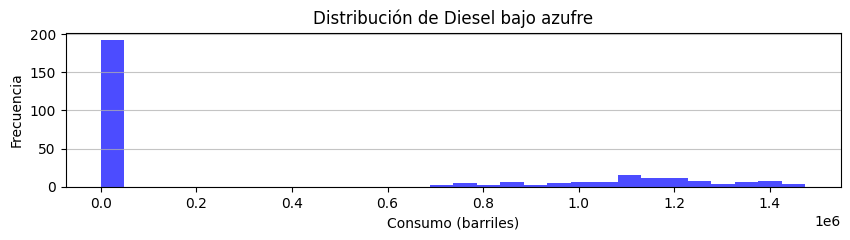

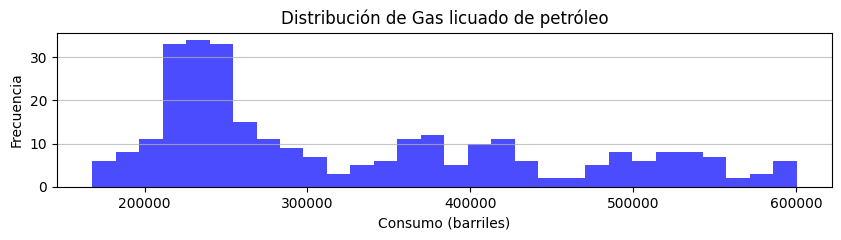

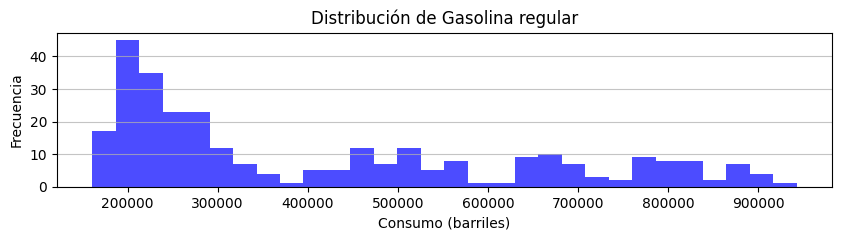

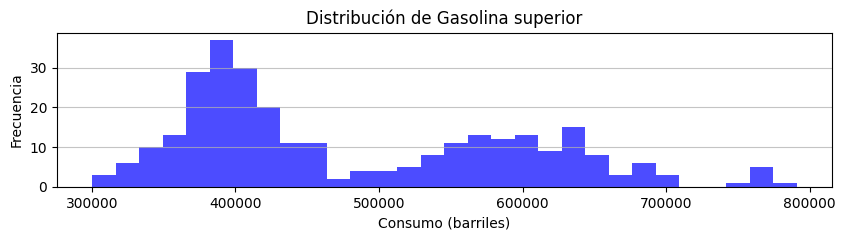

In [37]:
# Verificar distribución de cada una de las columnas graficamente
for column in consumos.columns[1:]:
    plt.figure(figsize=(10, 2))
    plt.hist(consumos[column], bins=30, alpha=0.7, color='blue')
    plt.title(f'Distribución de {column}')
    plt.xlabel('Consumo (barriles)')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Las variables NO se comportan normalmente. Tienen varios máximos. En el caso concreto del Diesel, la mayoría de los datos son 0.

In [38]:
# Determinar picos de consumo de cada uno de los combustibles. Las 5 fechas de consumo más altas.
for column in consumos.columns[1:]:
    top_dates = consumos.nlargest(5, column)[['Fecha', column]]
    print(f"Top 5 fechas de consumo para {column}:")
    print(top_dates)
    print("\n")



Top 5 fechas de consumo para Diesel bajo azufre:
         Fecha  Diesel bajo azufre
287 2024-12-01          1474651.06
266 2023-03-01          1463008.43
290 2025-03-01          1456533.00
279 2024-04-01          1428143.44
242 2021-03-01          1417371.99


Top 5 fechas de consumo para Gas licuado de petróleo:
         Fecha  Gas licuado de petróleo
285 2024-10-01                600453.87
286 2024-11-01                597059.97
292 2025-05-01                594599.75
290 2025-03-01                589796.81
266 2023-03-01                588892.16


Top 5 fechas de consumo para Gasolina regular:
         Fecha  Gasolina regular
285 2024-10-01         942394.34
287 2024-12-01         913940.78
290 2025-03-01         895068.46
280 2024-05-01         894533.14
292 2025-05-01         893158.40


Top 5 fechas de consumo para Gasolina superior:
         Fecha  Gasolina superior
285 2024-10-01          790948.04
287 2024-12-01          773715.97
251 2021-12-01          768107.97
290 2025-03-

Los picos de consumo parecen ocurrir en dos temporadas principalmente: en marzo-mayo, en época de verano y Semana Santa; y en octubre-diciembre, a finales de año en temporada de fiestas. Los picos parecen ocurrir en distinta época para cada uno de los combustibles

#### 1.2 Datos de importaciones

In [39]:
importaciones_2024 = pd.read_excel("importacion2024.xlsx", skiprows=6)
importaciones_2025 = pd.read_excel("importacion2025.xlsx", skiprows=6)

# Concantenar datos de 2024 y 2025
importaciones = pd.concat([importaciones_2024, importaciones_2025], ignore_index=True)
 # Dejar unicamente las columnas de interés
importaciones = importaciones[['Fecha', 'Diesel bajo azufre', 'Gas licuado de petróleo', 'Gasolina regular', 'Gasolina superior' ]]

importaciones

,Fecha,Diesel bajo azufre,Gas licuado de petróleo,Gasolina regular,Gasolina superior
0,2001-01-01,0.00,194065.738095,177776.50,373963.96
1,2001-02-01,0.00,170703.380952,123115.99,243091.07
2,2001-03-01,0.00,161837.371429,161726.42,312084.38
3,2001-04-01,0.00,163048.642857,127338.74,285054.89
4,2001-05-01,0.00,171518.861905,168730.19,300913.67
...,...,...,...,...,...
288,2025-01-01,1326108.68,NaN,788005.35,645188.60
289,2025-02-01,1102736.51,NaN,857375.76,686641.50
290,2025-03-01,1617427.16,NaN,800182.17,796513.62
291,2025-04-01,1226170.62,NaN,898147.98,643476.90


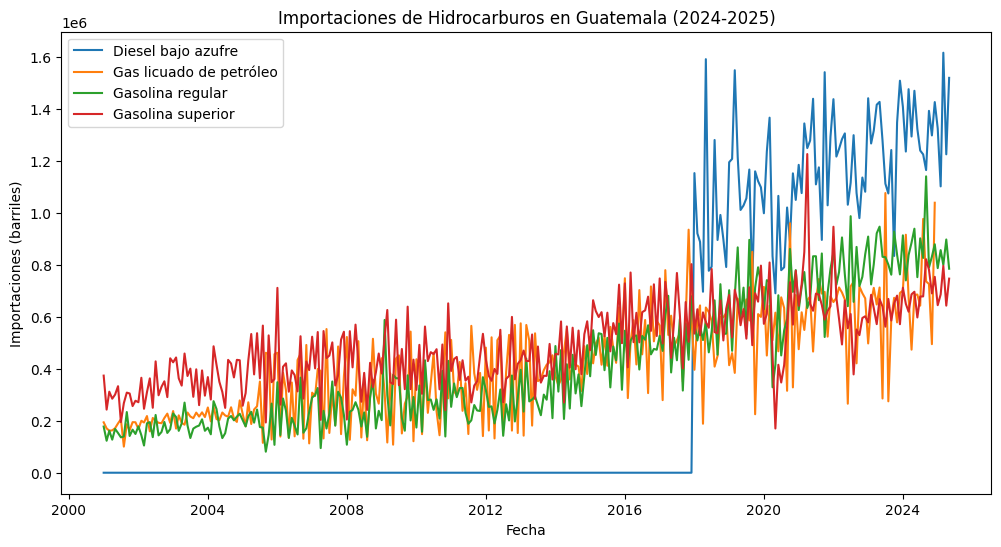

In [40]:
# Graficar los datos de importaciones
plt.figure(figsize=(12, 6))
for column in importaciones.columns[1:]:
    plt.plot(importaciones['Fecha'], importaciones[column], label=column)
plt.title("Importaciones de Hidrocarburos en Guatemala (2024-2025)")
plt.xlabel("Fecha")
plt.ylabel("Importaciones (barriles)")
plt.legend()


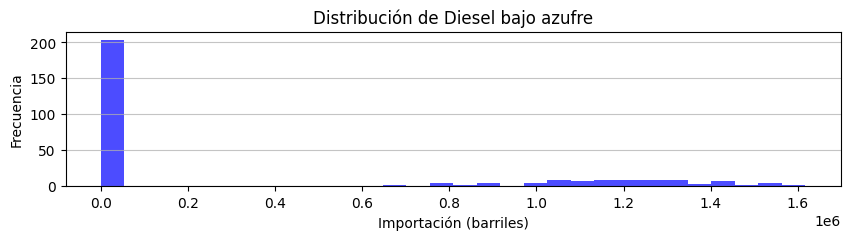

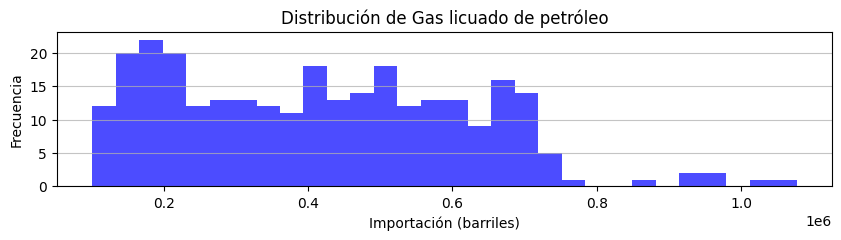

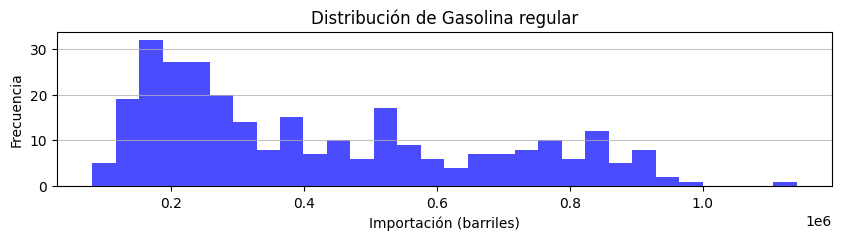

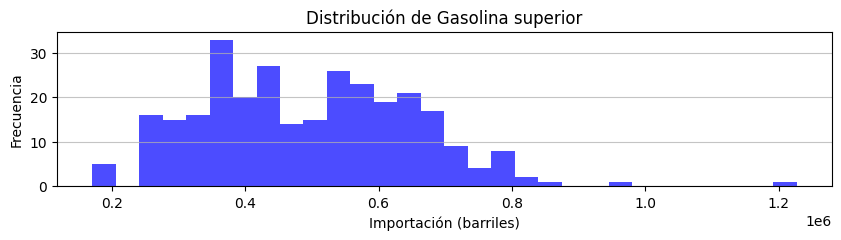

In [41]:
# Verificar distribución de cada una de las columnas graficamente de importaciones
for column in importaciones.columns[1:]:
    plt.figure(figsize=(10, 2))
    plt.hist(importaciones[column], bins=30, alpha=0.7, color='blue')
    plt.title(f'Distribución de {column}')
    plt.xlabel('Importación (barriles)')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


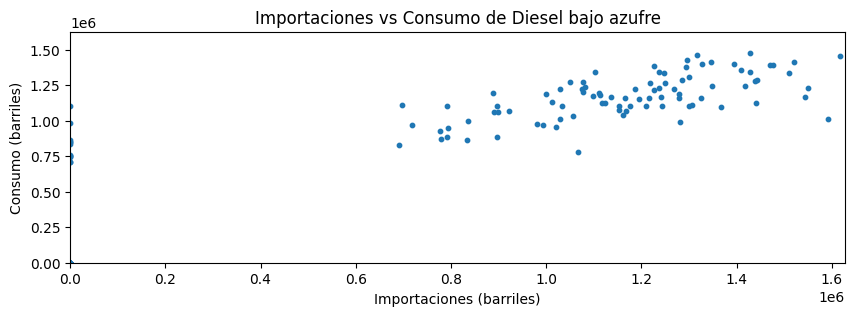

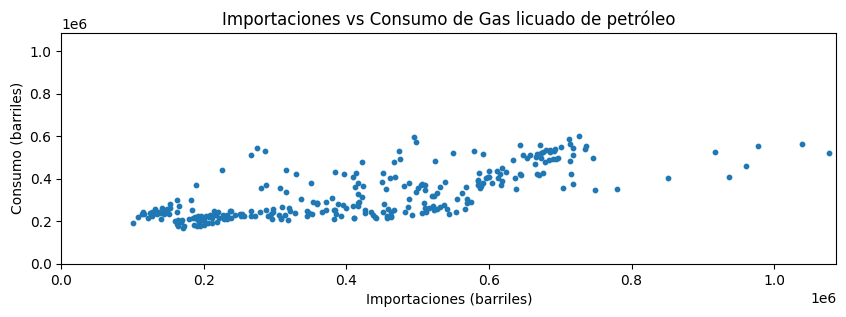

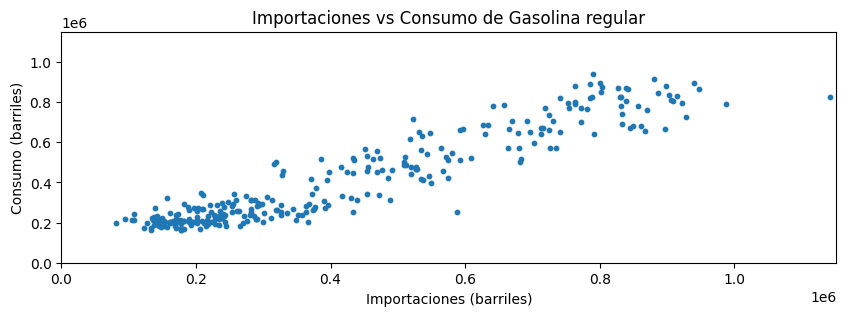

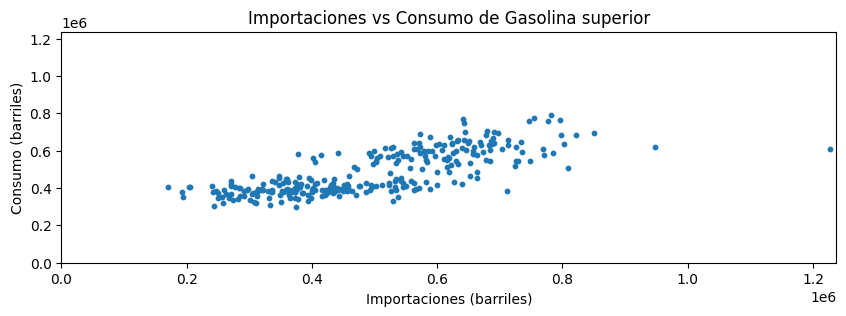

In [42]:
# Graficar importaciones vs. consumos de la gasolina regular
for column in importaciones.columns[1:]:
    plt.figure(figsize=(10, 3))
    plt.scatter(importaciones[column], consumos[column], s=10)
    plt.title(f'Importaciones vs Consumo de {column}')
    plt.xlabel('Importaciones (barriles)')
    plt.ylabel('Consumo (barriles)')
    xmax = importaciones[column].max()
    plt.xlim(0, xmax+10000)
    plt.ylim(0, xmax+10000)


#### 1.3 Datos de precios

In [43]:
precios_25 = pd.read_excel("precios.xlsx", skiprows=7, sheet_name='2025')
precios_24 = pd.read_excel("precios.xlsx", skiprows=7, sheet_name='2024')
precios_23 = pd.read_excel("precios.xlsx", skiprows=7, sheet_name='2023')
precios_22 = pd.read_excel("precios.xlsx", skiprows=6, sheet_name='2022')
precios_21 = pd.read_excel("precios.xlsx", skiprows=6, sheet_name='2021')
# Concantenar datos de precios
precios = pd.concat([precios_21, precios_22, precios_23, precios_24, precios_25], ignore_index=True)
# Dejar unicamente las columnas de interés
precios = precios[['FECHA','Tipo de Cambio','Superior', 'Regular', 'Diesel' ]]

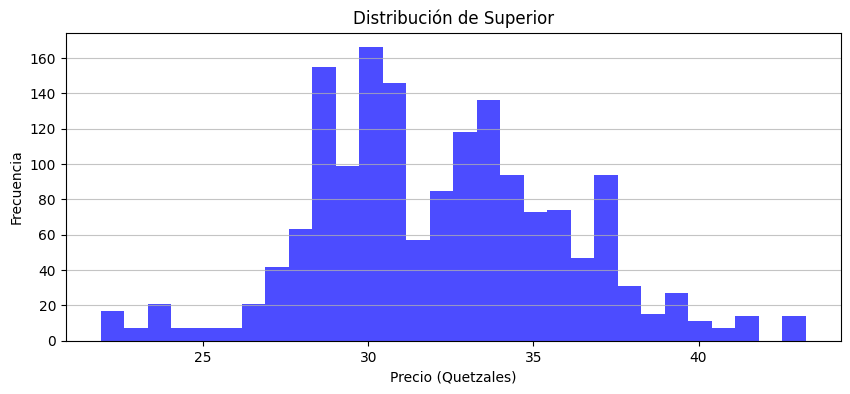

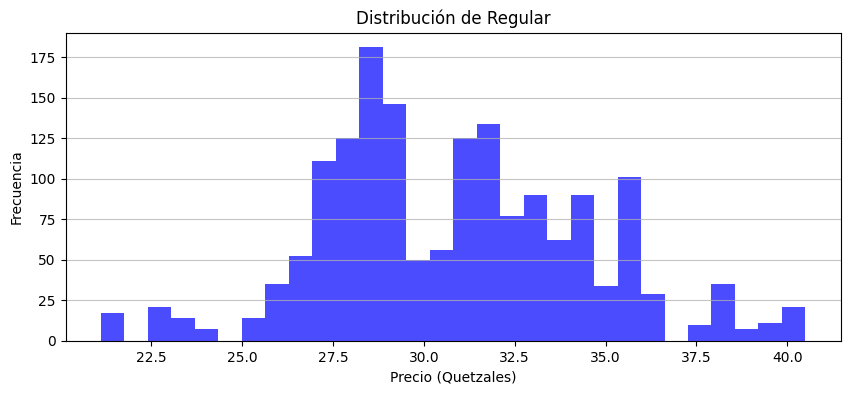

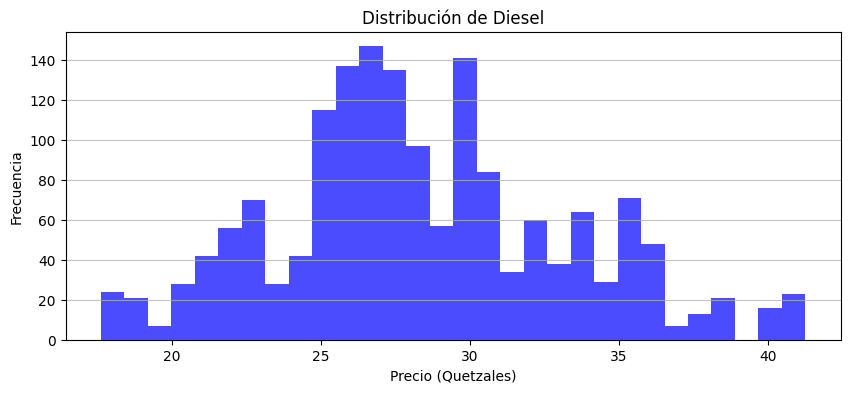

In [44]:
# Verificar distribución de cada una de las columnas graficamente de precios]
for column in precios.columns[2:]:
    plt.figure(figsize=(10, 4))
    plt.hist(precios[column], bins=30, alpha=0.7, color='blue')
    plt.title(f'Distribución de {column}')
    plt.xlabel('Precio (Quetzales)')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [45]:
# Verificar normalidad con la prueba de Shapiro-Wilk
from scipy.stats import shapiro
def check_normality(data):
    for column in data.columns[2:]:
        stat, p = shapiro(data[column])
        print(f'Statistics={stat:.3f}, p-value={p:.3f} for {column}')
        if p > 0.05:
            print(f'{column} parece seguir una distribución normal (no se rechaza H0)\n')
        else:
            print(f'{column} no parece seguir una distribución normal (se rechaza H0)\n')

check_normality(precios)

Statistics=0.989, p-value=0.000 for Superior
Superior no parece seguir una distribución normal (se rechaza H0)

Statistics=0.984, p-value=0.000 for Regular
Regular no parece seguir una distribución normal (se rechaza H0)

Statistics=0.987, p-value=0.000 for Diesel
Diesel no parece seguir una distribución normal (se rechaza H0)



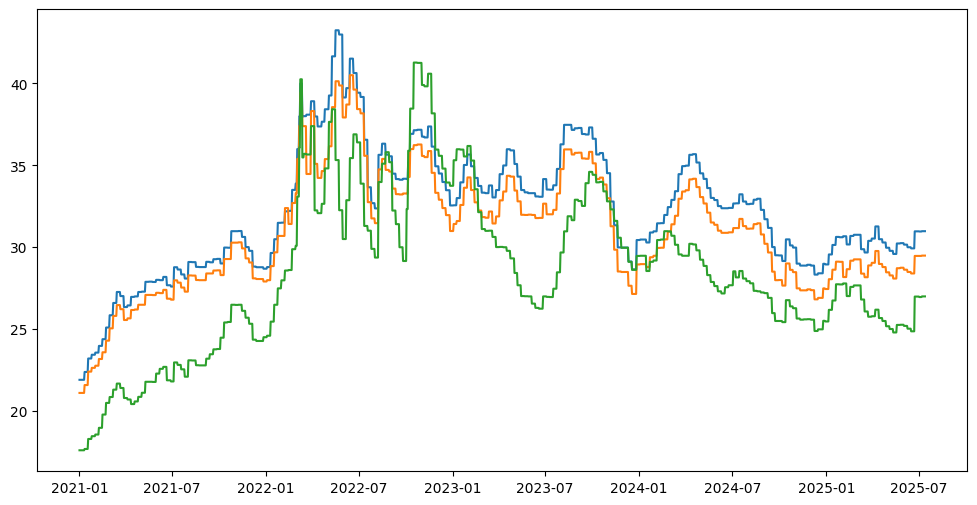

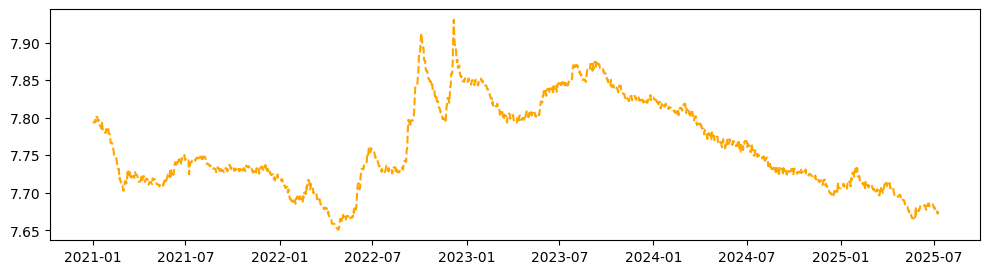

In [46]:
# Graficar los precios de los combustibles
plt.figure(figsize=(12, 6))
for column in precios.columns[2:]:
    plt.plot(precios['FECHA'], precios[column], label=column)  

plt.figure(figsize=(12, 3))
plt.plot(precios['FECHA'], precios['Tipo de Cambio'], label='Tipo de Cambio', linestyle='--', color='orange') 

### 2. Series de tiempo 

#### 2.1 Importación del combustible Regular

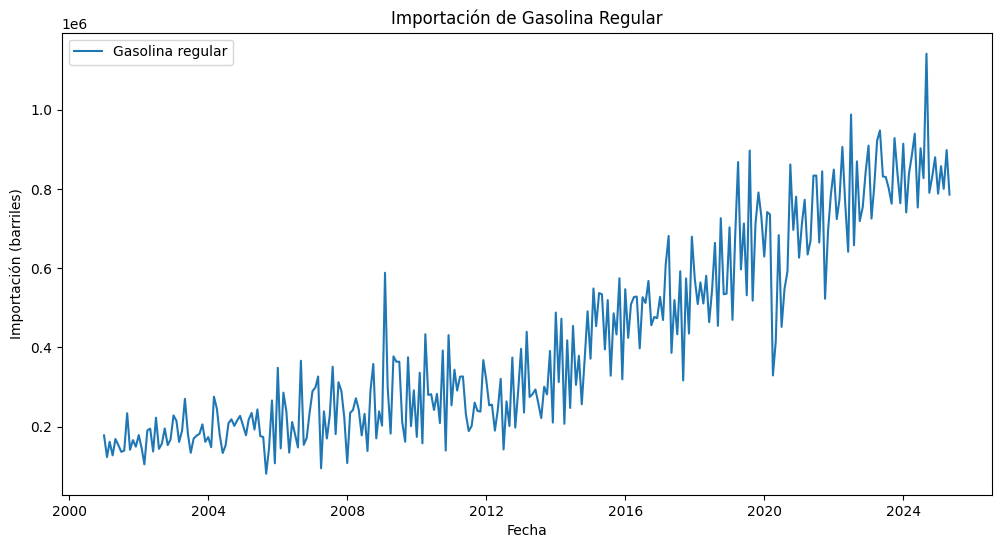

In [47]:
# Graficar de Importación del combustible Regular


importaciones['Fecha'] = pd.to_datetime(importaciones['Fecha'])
regular_imp = importaciones['Gasolina regular']
regular_imp.index = importaciones['Fecha']
plt.figure(figsize=(12, 6))
plt.plot(regular_imp.index, regular_imp, label='Gasolina regular')
plt.title("Importación de Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Importación (barriles)")
plt.legend()
plt.show()

- Hay una tendencia creciente aparentemente lineal
- La estacionalidad no es inmediatamente evidente, sin embargo hay claros picos y valles que probablemente se replican anualmente.
- Hay puntos atípicos alrededor de 2020, pero no tantos como en el consumo de gasolina superior.

##### Descomposición

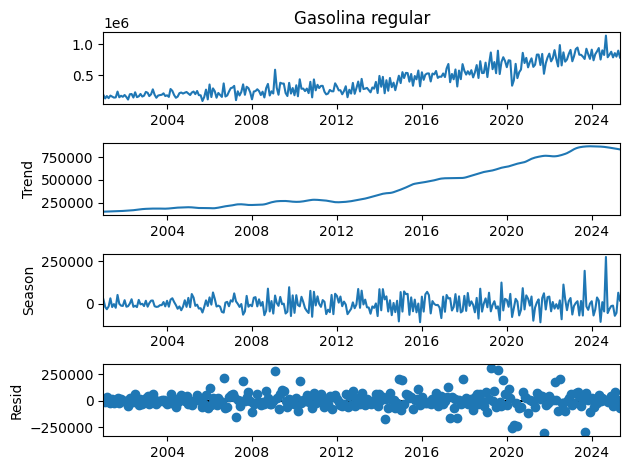

In [48]:
from statsmodels.tsa.seasonal import STL

res = STL(regular_imp.dropna(), period=12, robust=True).fit()
res.plot()
plt.show()


- **Tendencia**: Sube de manera sostenida. No es estacionaria en media. El crecimiento no es lineal.
- **Estacionalidad:** Patrón sí parece repetirse cada 12 meses. 
- **Residuos**: Están dispersos alrededor del cero mayoritariamente. Hay algunos puntos atípicos pero relativamente pocos.

##### Desviación Móvil

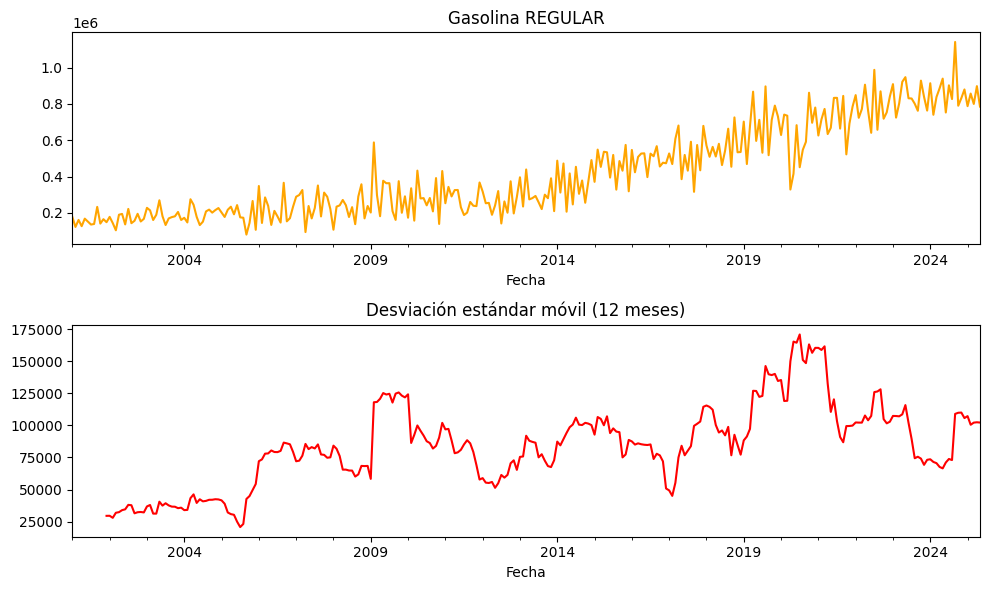

In [49]:
desvMovil = regular_imp.rolling(window=12).std()

fig, ax = plt.subplots(2, 1, figsize=(10,6))
regular_imp.plot(ax=ax[0], color="orange", title="Gasolina REGULAR")
desvMovil.plot(ax=ax[1], color="red", title="Desviación estándar móvil (12 meses)")
plt.tight_layout()
plt.show()

Aquí la desviación estándar móvil **MUESTRA UNA TENDENCIA CRECIENTE** clara, sobre todo a partir de 2014–2018, lo que indica **heterocedasticidad**.
Eso significa que para la modelación convendría aplicar una transformación logarítmica para estabilizar la varianza antes de diferenciar.

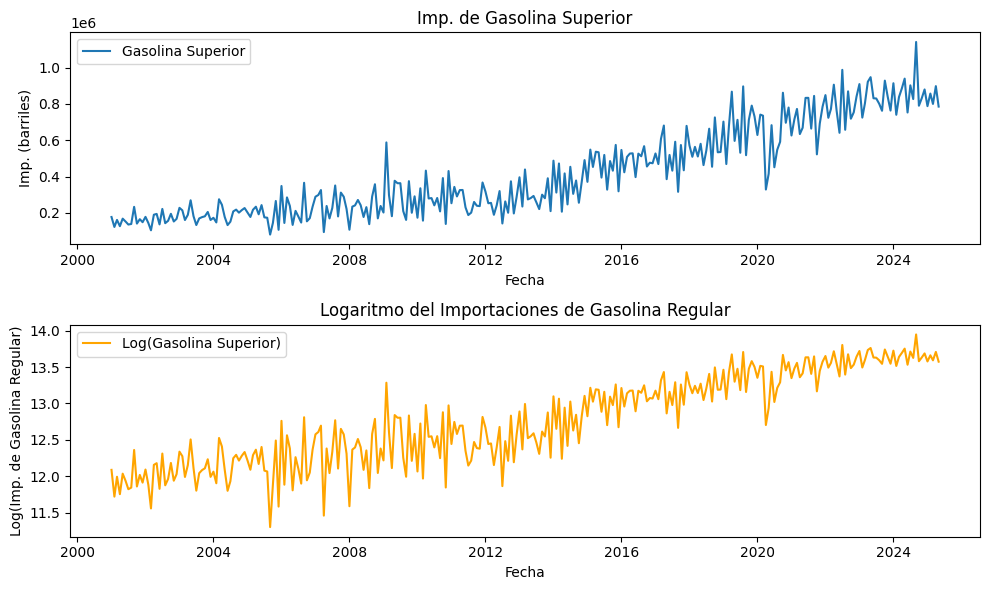

In [50]:
regular_imp_log = np.log(regular_imp)

# Comparar en subplots
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(regular_imp.index, regular_imp, label='Gasolina Superior')
plt.title("Imp. de Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Imp. (barriles)")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(regular_imp_log.index, regular_imp_log, label='Log(Gasolina Superior)', color='orange')
plt.title("Logaritmo del Importaciones de Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Log(Imp. de Gasolina Regular)")
plt.legend()
plt.tight_layout()



##### Estacionariedad de media

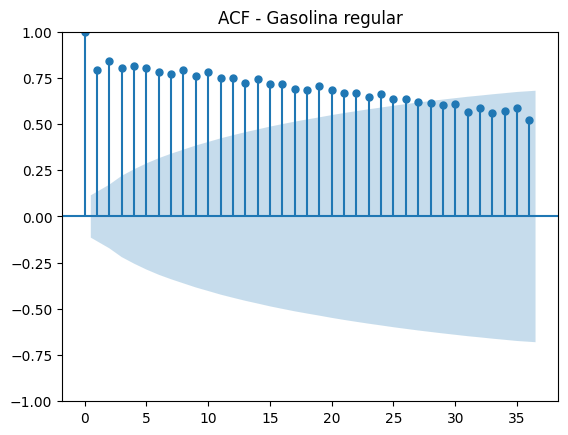

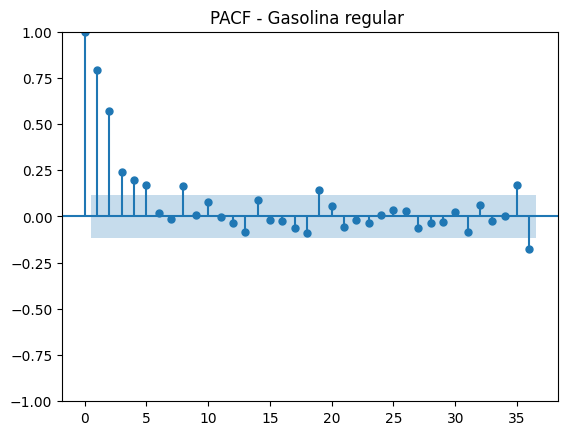

ADF: estadístico=-0.290, p-valor=0.927


In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# ACF y PACF
plot_acf(regular_imp_log.dropna(), lags=36)
plt.title("ACF - Gasolina regular")
plt.show()

plot_pacf(regular_imp_log.dropna(), lags=36, method="ywm")
plt.title("PACF - Gasolina regular ")
plt.show()

# Prueba ADF
stat, pval, lags, nobs, _, _ = adfuller(regular_imp_log.dropna(), autolag="AIC")
print(f"ADF: estadístico={stat:.3f}, p-valor={pval:.3f}")


Podemos confirmar que la media no es estacionaria, ya que la serie tiene una tendencia creciente. La prueba ADF muestra un p-valor 0.927 mayor a 0.05, lo que indica que no podemos rechazar la hipótesis nula de que la serie es no estacionaria.

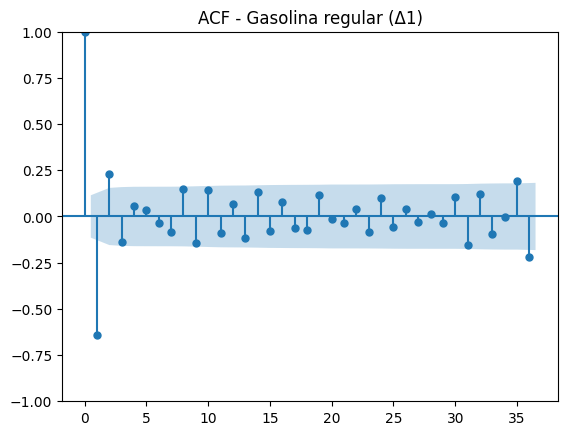

ADF Δ1: estadístico=-7.905, p-valor=0.000


In [52]:
serie_d1 = regular_imp_log.diff()

plot_acf(serie_d1.dropna(), lags=36)
plt.title("ACF - Gasolina regular (Δ1)")
plt.show()

stat_d1, pval_d1, *_ = adfuller(serie_d1.dropna(), autolag="AIC")
print(f"ADF Δ1: estadístico={stat_d1:.3f}, p-valor={pval_d1:.3f}")


Podemos observar que con la primera diferenciación, la cola larga desaparece y ya tenemos estacionariedad en media.

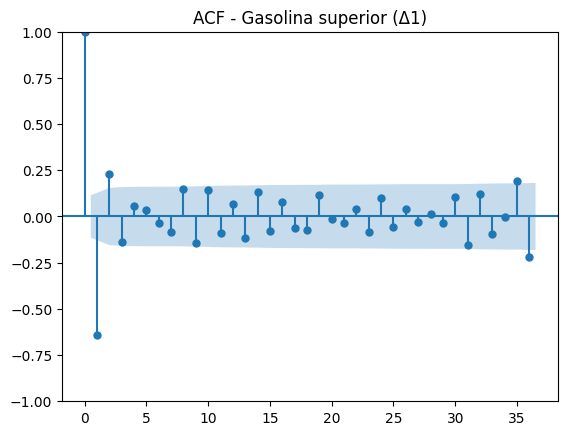

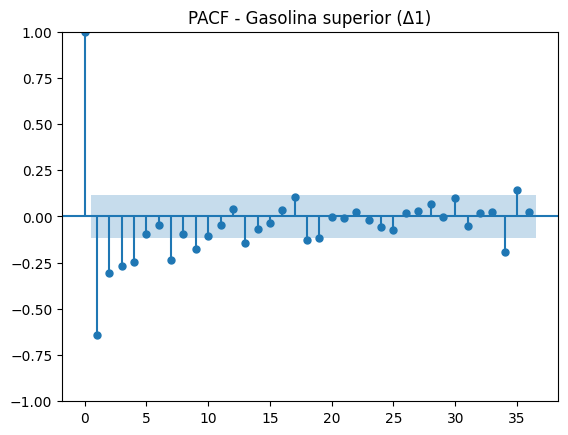

In [53]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF y PACF para elegir p y q iniciales
plot_acf(serie_d1.dropna(), lags=36)
plt.title("ACF - Gasolina superior (Δ1)")
plt.show()

plot_pacf(serie_d1.dropna(), lags=36, method="ywm")
plt.title("PACF - Gasolina superior (Δ1)")
plt.show()


##### Modelo ARIMA

Se seleccionarán:
- p = 1  porque en la PACF hay un corte claro 1, indicando componente AR(1).
- d = 1 porque la serie mostró tendencia no estacionaria y fue necesario diferenciar una vez para estabilizarla.
- q = 0 o 1 porque la ACF no presenta picos significativos más allá del 1, sugiriendo un MA débil.

c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

                      modelo         AIC         BIC
1  (1, 1, 1) x (0, 0, 0, 12)   45.274913   56.284555
0  (1, 1, 0) x (0, 0, 0, 12)  124.683389  132.030035


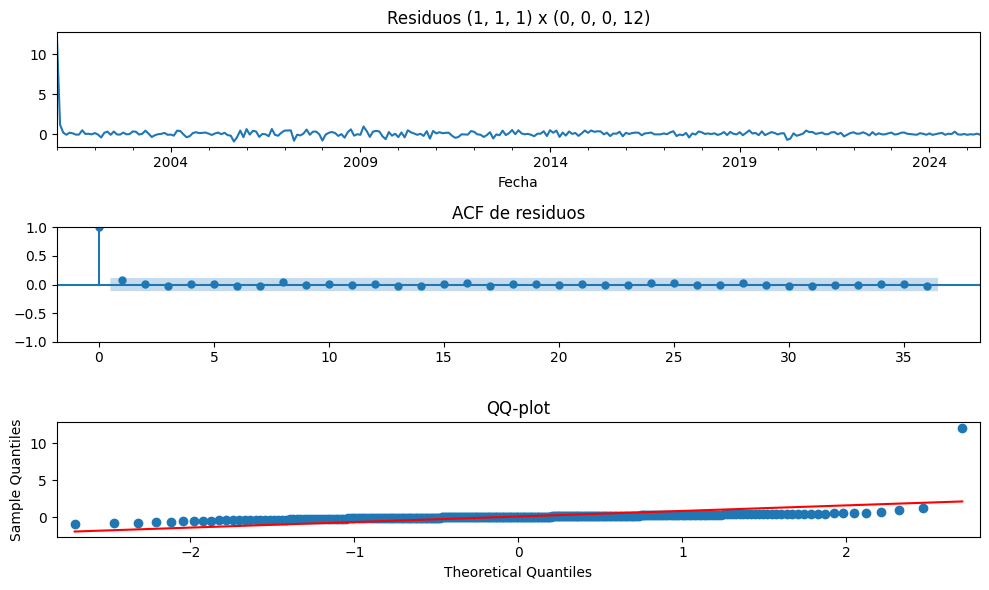

Ljung-Box (lags=[12,24,36]):
     lb_stat  lb_pvalue
12  2.905520   0.996175
24  3.940023   0.999999
36  5.268315   1.000000


In [54]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Serie: asegúrate que es gasolina regular y tenga frecuencia mensual
y = regular_imp_log.dropna()

def fit_sarima(order, seas):
    m = SARIMAX(y, order=order, seasonal_order=seas,
                enforce_stationarity=False, enforce_invertibility=False)
    r = m.fit(disp=False)
    return r

# Candidatos: sin estacionalidad SARIMA, solo ARIMA(p,d,q)
cands = [
    ((1,1,0),(0,0,0,12)),  # ARIMA(1,1,0)
    ((1,1,1),(0,0,0,12)),  # ARIMA(1,1,1)
]

res_objs, rows = {}, []
for o, s in cands:
    res = fit_sarima(o, s)
    key = f"{o} x {s}"
    res_objs[key] = res
    rows.append([key, res.aic, res.bic])

tabla = pd.DataFrame(rows, columns=["modelo","AIC","BIC"]).sort_values("AIC")
print(tabla)

# Diagnóstico del mejor por AIC
best_key = tabla.iloc[0,0]
best = res_objs[best_key]
resid = best.resid.dropna()

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(311); resid.plot(ax=ax1); ax1.set_title(f"Residuos {best_key}")
ax2 = fig.add_subplot(312); plot_acf(resid, lags=36, ax=ax2); ax2.set_title("ACF de residuos")
ax3 = fig.add_subplot(313); qqplot(resid, line="s", ax=ax3); ax3.set_title("QQ-plot")
plt.tight_layout(); plt.show()

print("Ljung-Box (lags=[12,24,36]):")
print(acorr_ljungbox(resid, lags=[12,24,36], return_df=True))


El mejor modelo es ARIMA(1,1,1) porque tiene los menores valores de AIC y BIC

A continuación haremos la prueba con autoarima para verificar que es el mejor modelo.

In [55]:
from pmdarima import auto_arima

modelo_auto = auto_arima(
    regular_imp_log,                # tu serie original
    d=None,                  # ya sabemos que es necesario diferenciar
    start_p=0, start_q=0,
    max_p=4, max_q=4,
    trace=True,
    information_criterion='aic',
)

print(modelo_auto.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=279.211, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=127.229, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45.782, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=277.261, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=34.176, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=34.282, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=33.897, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=36.438, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=35.870, Time=0.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=35.918, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=34.578, Time=0.88 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=45.794, Time=0.17 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 3.715 seconds
                               SARIMAX Results  

auto_arima seleccionó ARIMA(1,1,2) sin estacionalidad sobre la serie log, tiene un AIC = 33.897.

{'RMSE': 104921.89759073874, 'MAE': 90840.98312430631, 'MAPE': 11.179764277911714}


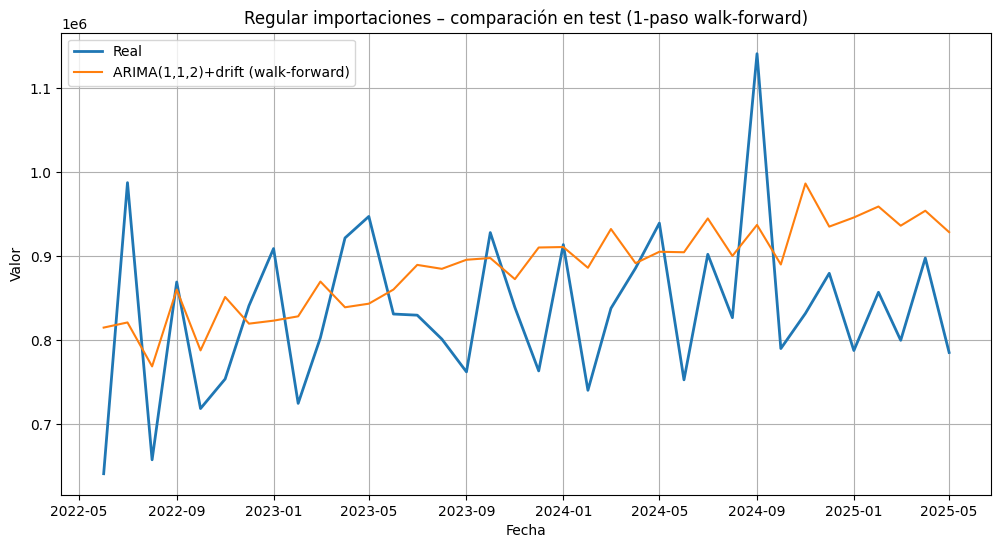

In [56]:
import numpy as np, pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# ===== helpers =====
def mae(y, yhat): return np.mean(np.abs(y - yhat))
def rmse(y, yhat): return mean_squared_error(y, yhat, squared=False)
def mape(y, yhat): return np.mean(np.abs((y - yhat)/y))*100

# ===== datos =====
y = regular_imp.dropna().asfreq("MS")          # escala original
y_log = np.log(y)                                        # trabajamos en log
H = 36
start_idx = len(y) - H
y_te = y.iloc[start_idx:]

# ===== 1-step walk-forward en log con drift, deslog paso a paso =====
preds = []
for t in range(start_idx, len(y_log)):
    train_log = y_log.iloc[:t]  # todo hasta t-1
    m = SARIMAX(train_log, order=(1,1,2), seasonal_order=(0,0,0,12),
                trend='c', enforce_stationarity=True, enforce_invertibility=True).fit(disp=False)
    fc = m.get_forecast(steps=1)
    mu_log = fc.predicted_mean.iloc[0]
    var_log = fc.var_pred_mean.iloc[0]
    # deslog con corrección de sesgo por horizonte 1
    yhat = np.exp(mu_log + 0.5*var_log)
    preds.append(yhat)

y_pred_arima = pd.Series(preds, index=y_te.index)

# ===== métricas =====
print({
    "RMSE": rmse(y_te.values, y_pred_arima.values),
    "MAE":  mae(y_te.values, y_pred_arima.values),
    "MAPE": mape(y_te.values, y_pred_arima.values)
})


# y_pred_hw, y_pred_sarima1, y_pred_sarima2 ya los tienes del backtest anterior
plt.figure(figsize=(12,6))
plt.plot(y_te.index, y_te, label="Real", linewidth=2)
plt.plot(y_te.index, y_pred_arima, label="ARIMA(1,1,2)+drift (walk-forward)")
# Si quieres, añade:
# plt.plot(y_te.index, y_pred_hw, label="Holt-Winters (add,add)")
# plt.plot(y_te.index, y_pred_sarima1, label="SARIMA(1,1,1)(2,0,1)[12]")
plt.title("Regular importaciones – comparación en test (1-paso walk-forward)")
plt.xlabel("Fecha"); plt.ylabel("Valor"); plt.legend(); plt.grid(True)
plt.show()



##### Comparación de Modelo ARIMA con Red Neuronal

c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\neural_network\_m

ARIMA(1,1,2)+drift: {'RMSE': 104921.89759073874, 'MAE': 90840.98312430631, 'MAPE': 11.179764277911714}
MLP(12 lags):        {'RMSE': 283651.81007027236, 'MAE': 208497.95817861834, 'MAPE': 26.230890727837437}


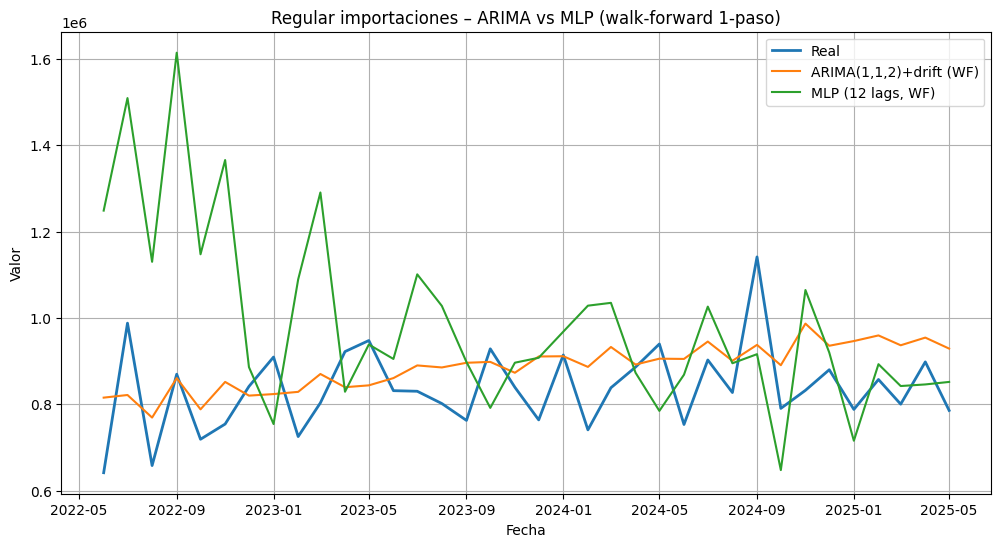

In [57]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# ========= Helpers
def mae(y, yhat):  return np.mean(np.abs(y - yhat))
def rmse(y, yhat): return mean_squared_error(y, yhat, squared=False)
def mape(y, yhat): return np.mean(np.abs((y - yhat)/y))*100

def make_lagged(series: pd.Series, nlags=12):
    """Devuelve DataFrame con y y columnas lag1..lagL (sin NAs)."""
    df = pd.DataFrame({"y": series})
    for L in range(1, nlags+1):
        df[f"lag{L}"] = df["y"].shift(L)
    return df.dropna()

# ========= Datos (usamos log para estabilizar varianza)
y = regular_imp.dropna().asfreq("MS")
y_log = np.log(y)

H = 36
start_idx = len(y_log) - H
idx_test = y.index[start_idx:]   # para graficar/metricar en escala original

# ========= MLP en esquema walk-forward 1-paso
L = 12  # número de lags (ajústalo si quieres)
preds = []

for t in range(start_idx, len(y_log)):
    # 1) dataset hasta t-1 en log
    train_log = y_log.iloc[:t]
    df_tr = make_lagged(train_log, nlags=L)
    X_tr, y_tr = df_tr.drop(columns=["y"]).values, df_tr["y"].values

    # 2) última fila disponible para predecir (usa lags en t-1..t-L)
    last_row = pd.DataFrame({f"lag{l}": [train_log.iloc[-l]] for l in range(1, L+1)})
    last_row = last_row[[f"lag{l}" for l in range(1, L+1)]].values

    # 3) pipeline: estandarizar X + MLP
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPRegressor(
            hidden_layer_sizes=(32,),
            activation="relu",
            solver="adam",
            alpha=1e-4,
            max_iter=1000,
            random_state=7,
            early_stopping=True,
            n_iter_no_change=20,
            validation_fraction=0.15,
        ))
    ])

    pipe.fit(X_tr, y_tr)
    yhat_log = pipe.predict(last_row)[0]

    # 4) deslogaritmar (sin corrección de sesgo; aceptable para comparar)
    preds.append(np.exp(yhat_log))

y_pred_mlp = pd.Series(preds, index=idx_test, name="MLP(12 lags)")



# ========= Métricas comparativas en test
y_te = y.loc[idx_test]

res_arima = {"RMSE": rmse(y_te, y_pred_arima), "MAE": mae(y_te, y_pred_arima), "MAPE": mape(y_te, y_pred_arima)}
res_mlp   = {"RMSE": rmse(y_te, y_pred_mlp),   "MAE": mae(y_te, y_pred_mlp),   "MAPE": mape(y_te, y_pred_mlp)}
print("ARIMA(1,1,2)+drift:", res_arima)
print("MLP(12 lags):       ", res_mlp)

# ========= Gráfico comparación
plt.figure(figsize=(12,6))
plt.plot(y_te.index, y_te, label="Real", linewidth=2)
plt.plot(y_pred_arima.index, y_pred_arima, label="ARIMA(1,1,2)+drift (WF)")
plt.plot(y_pred_mlp.index, y_pred_mlp, label="MLP (12 lags, WF)")
plt.title("Regular importaciones – ARIMA vs MLP (walk-forward 1-paso)")
plt.xlabel("Fecha"); plt.ylabel("Valor"); plt.legend(); plt.grid(True)
plt.show()


El modelo ARIMA funcionó significativamente mejor que una red neuronal MLP. Que además llevó considerablemente más tiempo en entrenar. Para este caso, los modelos de series de tiempo son más útiles en predecir los valores que una red neuronal simple.

#### 2.2 Consumo del combustible Superior

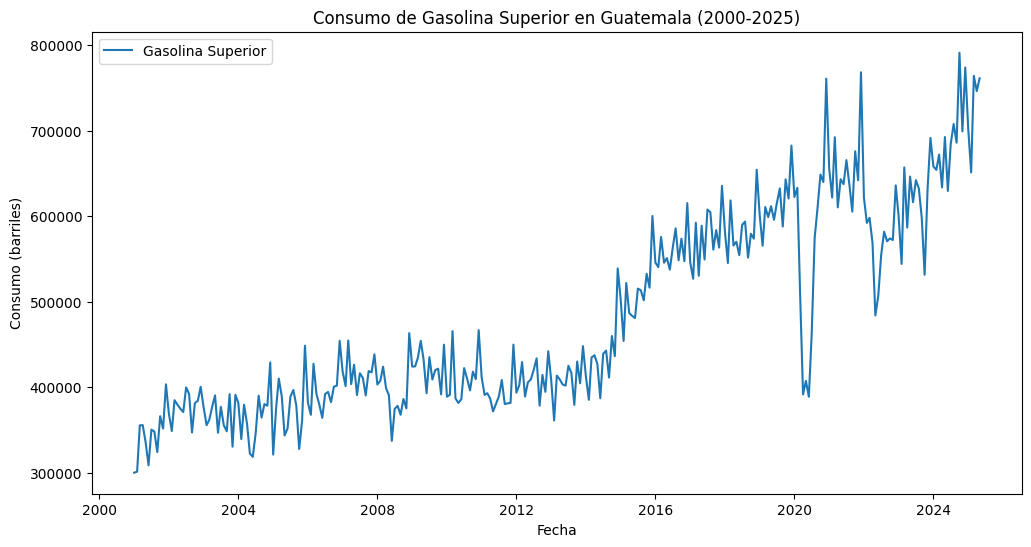

In [58]:
# Graficar de Consumos el combustible Superior
consumos['Fecha'] = pd.to_datetime(consumos['Fecha'])
superior_consumo = consumos['Gasolina superior']
superior_consumo.index = consumos['Fecha']
plt.figure(figsize=(12, 6))
plt.plot(superior_consumo.index, superior_consumo, label='Gasolina Superior')
plt.title("Consumo de Gasolina Superior en Guatemala (2000-2025)")
plt.xlabel("Fecha")
plt.ylabel("Consumo (barriles)")   
plt.legend()
plt.show()

- Hay una tendencia clara creciente desde 2014
- La estacionalidad no es inmediatamente evidente, sin embargo hay claros picos y valles que probablemente se replican anualmente.
- Hay puntos atípicos alrededor de 2020 y 2022, causados probablemente por COVID-19 y la invasión de Rusia a Ucrania.

##### Descomposición

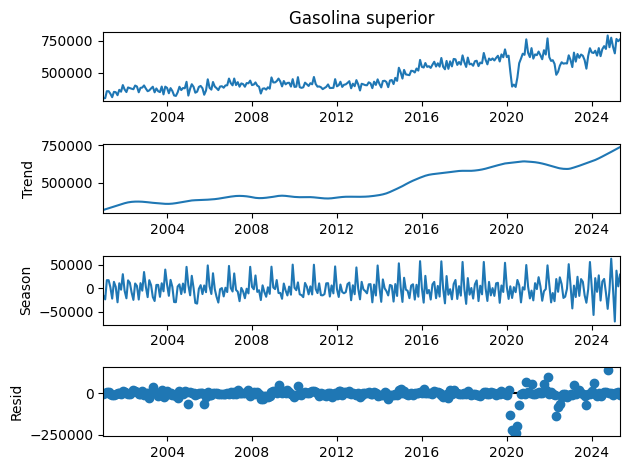

In [59]:
from statsmodels.tsa.seasonal import STL

res = STL(superior_consumo.dropna(), period=12, robust=True).fit()
res.plot()
plt.show()


- **Tendencia**: Sube de manera sostenida. No es estacionaria en media. El crecimiento no es lineal, acelera a partir de 2014.
- **Estacionalidad:** Patrón sí parece repetirse cada 12 meses. Las oscilaciones se encuentran en torno a 50,000 barriles. La amplitud crece en los años más recientes.
- **Residuos**: Están dispersos alrededor del cero mayoritariamente, pero en 2020, 2022, 2024 hay eventos extraordinarios que no están explicados por la tendencia o la estacionalidad.

##### Desviación Móvil

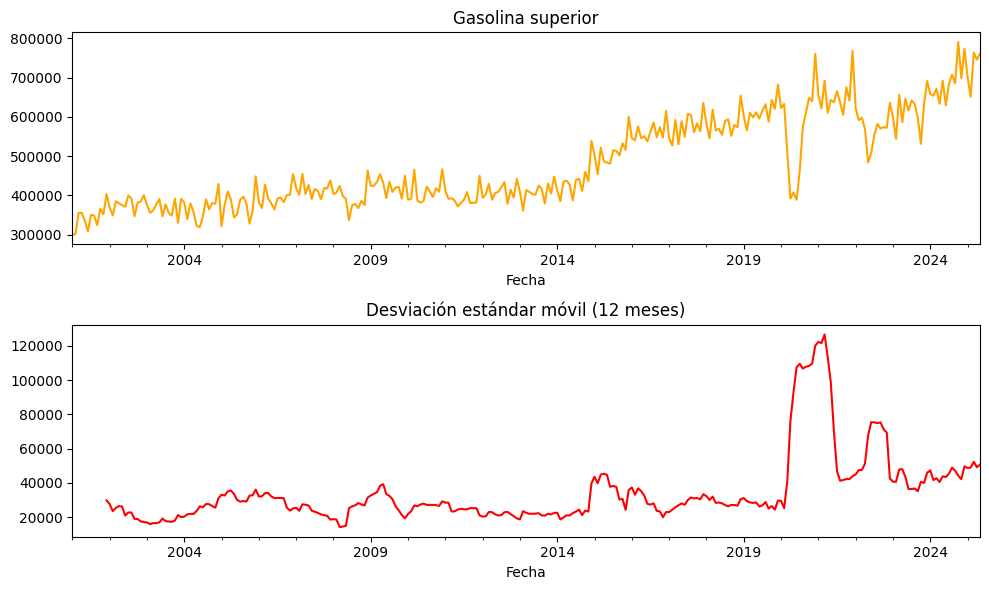

In [60]:
desvMovil = superior_consumo.rolling(window=12).std()

fig, ax = plt.subplots(2, 1, figsize=(10,6))
superior_consumo.plot(ax=ax[0], color="orange", title="Gasolina superior")
desvMovil.plot(ax=ax[1], color="red", title="Desviación estándar móvil (12 meses)")
plt.tight_layout()
plt.show()

Aunque la desviación estándar móvil no muestra una tendencia creciente sostenida, sí tiene picos atípicos asociados a eventos externos. Por lo tanto, para evitar que estos valores sesguen el ajuste, aplicaremos una transformación logarítmica para reducir el impacto relativo de estos picos.

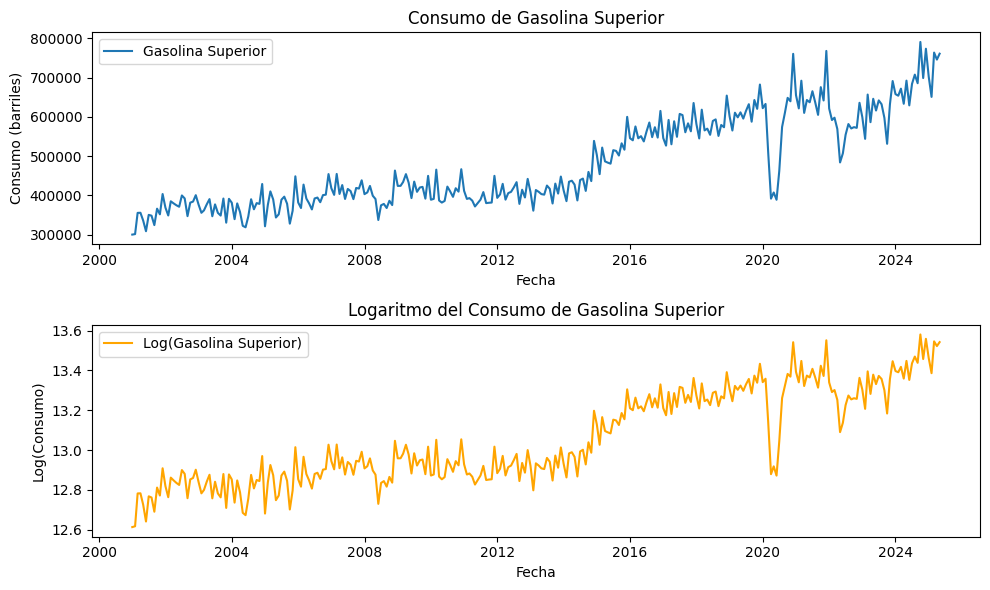

In [61]:
superior_consumo_log = np.log(superior_consumo)

# Comparar en subplots
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(superior_consumo.index, superior_consumo, label='Gasolina Superior')
plt.title("Consumo de Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Consumo (barriles)")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(superior_consumo_log.index, superior_consumo_log, label='Log(Gasolina Superior)', color='orange')
plt.title("Logaritmo del Consumo de Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Log(Consumo)")
plt.legend()
plt.tight_layout()



##### Estacionariedad de media

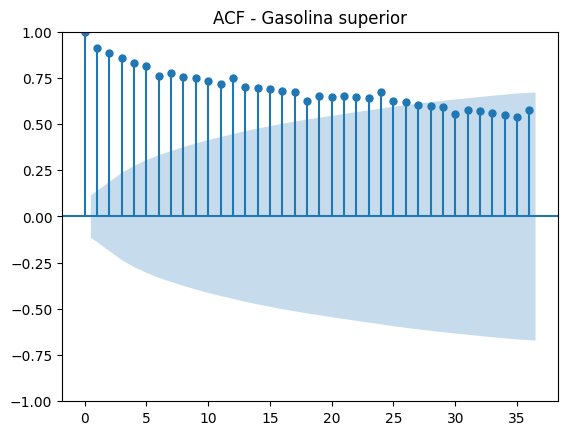

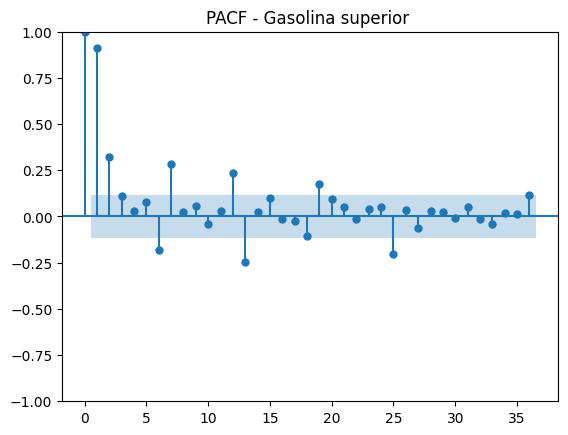

ADF: estadístico=0.150, p-valor=0.969


In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# ACF y PACF
plot_acf(superior_consumo.dropna(), lags=36)
plt.title("ACF - Gasolina superior")
plt.show()

plot_pacf(superior_consumo.dropna(), lags=36, method="ywm")
plt.title("PACF - Gasolina superior ")
plt.show()

# Prueba ADF
stat, pval, lags, nobs, _, _ = adfuller(superior_consumo.dropna(), autolag="AIC")
print(f"ADF: estadístico={stat:.3f}, p-valor={pval:.3f}")


Podemos confirmar que la media no es estacionaria, ya que la serie tiene una tendencia creciente. La prueba ADF muestra un p-valor 0.97 mayor a 0.05, lo que indica que no podemos rechazar la hipótesis nula de que la serie es no estacionaria.

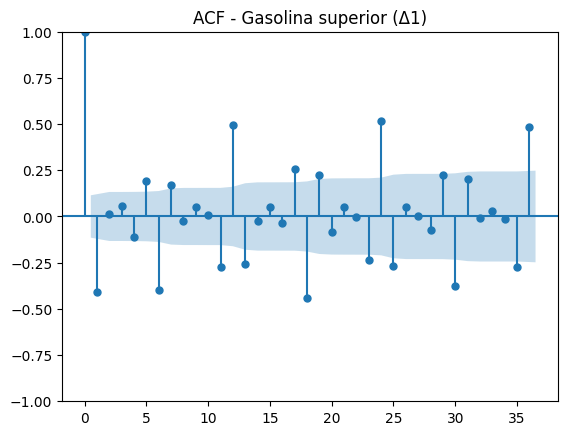

ADF Δ1: estadístico=-4.297, p-valor=0.000


In [63]:
serie_d1 = superior_consumo.diff()

plot_acf(serie_d1.dropna(), lags=36)
plt.title("ACF - Gasolina superior (Δ1)")
plt.show()

stat_d1, pval_d1, *_ = adfuller(serie_d1.dropna(), autolag="AIC")
print(f"ADF Δ1: estadístico={stat_d1:.3f}, p-valor={pval_d1:.3f}")


Podemos observar que con la primera diferenciación, la cola larga desaparece y ya tenemos estacionariedad en media.

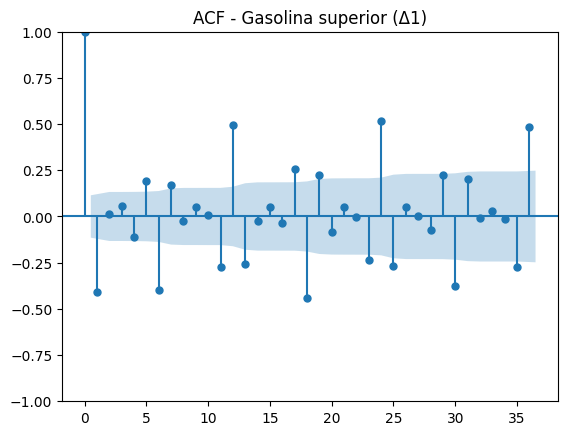

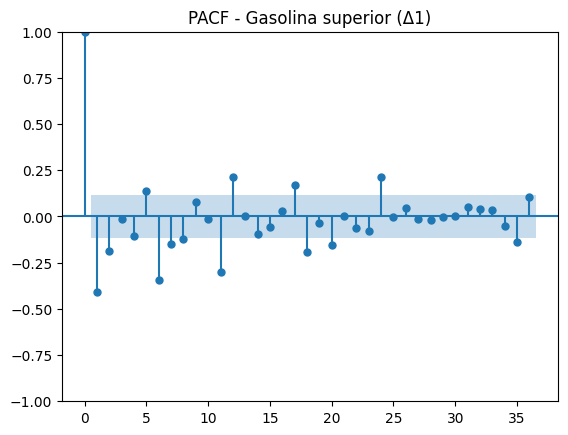

In [64]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF y PACF para elegir p y q iniciales
plot_acf(serie_d1.dropna(), lags=36)
plt.title("ACF - Gasolina superior (Δ1)")
plt.show()

plot_pacf(serie_d1.dropna(), lags=36, method="ywm")
plt.title("PACF - Gasolina superior (Δ1)")
plt.show()


##### Modelo ARIMA

Se seleccionarán:
- d=1: porque luego de una diferencia se estabiliza la ACF
- en la ACF de Δ1 se observan picos significativos en rezagos 12, 24, 36, indicando un patrón estacional anual
- en los rezagos bajos (1–3), la ACF presenta autocorrelaciones significativas
- en la PACF de Δ1 hay valores significativos en rezagos 1 y 2, lo que sugiere incluir un componente AR de bajo orden

Candidatos:

SARIMA(1,1,1)(0,0,1)[12]

SARIMA(2,1,1)(0,0,1)[12]

SARIMA(1,1,2)(0,0,1)[12]

Control sin estacionalidad: ARIMA(4,1,3) 

c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

                      modelo         AIC         BIC
3  (4, 1, 3) x (0, 0, 0, 12) -681.794382 -652.490698
1  (2, 1, 1) x (0, 0, 1, 12) -646.353584 -628.215479
0  (1, 1, 1) x (0, 0, 1, 12) -641.369948 -626.859464
2  (1, 1, 2) x (0, 0, 1, 12) -633.844657 -615.724570


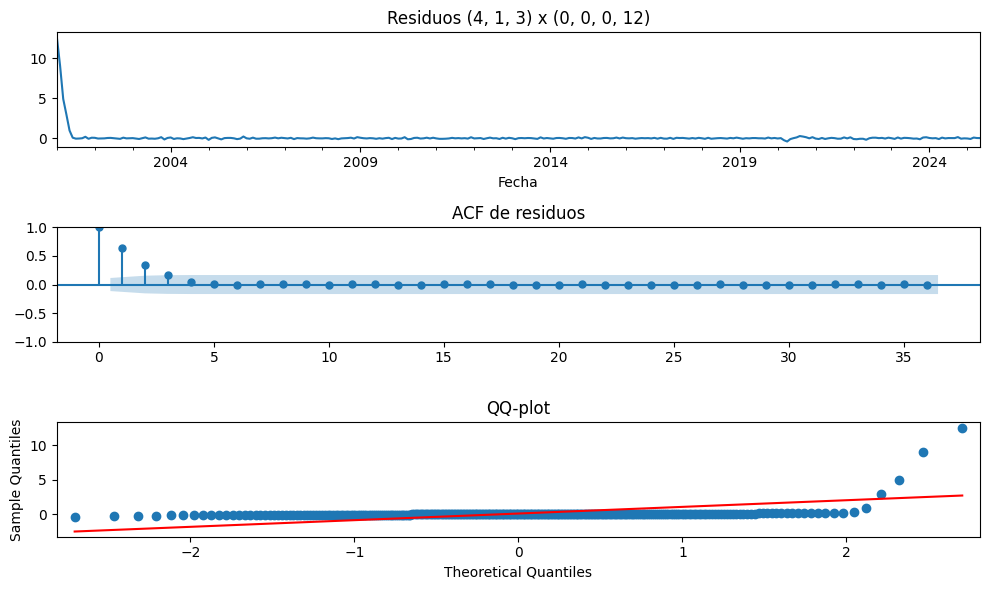

Ljung-Box (lags=[12,24,36]):
       lb_stat     lb_pvalue
12  164.335810  6.857609e-29
24  164.352924  6.819934e-23
36  164.398208  2.523537e-18


In [65]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = superior_consumo_log.dropna()

def fit_sarima(order, seas):
    m = SARIMAX(y, order=order, seasonal_order=seas,
                enforce_stationarity=False, enforce_invertibility=False)
    r = m.fit(disp=False)
    return r

cands = [
    ((1,1,1),(0,0,1,12)),
    ((2,1,1),(0,0,1,12)),
    ((1,1,2),(0,0,1,12)),
    ((4,1,3),(0,0,0,12)),  # ARIMA(4,1,3)
]

res_objs, rows = {}, []
for o, s in cands:
    res = fit_sarima(o, s)
    key = f"{o} x {s}"
    res_objs[key] = res
    rows.append([key, res.aic, res.bic])

tabla = pd.DataFrame(rows, columns=["modelo","AIC","BIC"]).sort_values("AIC")
print(tabla)

# Diagnóstico del mejor por AIC
best_key = tabla.iloc[0,0]
best = res_objs[best_key]
resid = best.resid.dropna()

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(311); resid.plot(ax=ax1); ax1.set_title(f"Residuos {best_key}")
ax2 = fig.add_subplot(312); plot_acf(resid, lags=36, ax=ax2); ax2.set_title("ACF de residuos")
ax3 = fig.add_subplot(313); qqplot(resid, line="s", ax=ax3); ax3.set_title("QQ-plot")
plt.tight_layout(); plt.show()

print("Ljung-Box (lags=[12,24,36]):")
print(acorr_ljungbox(resid, lags=[12,24,36], return_df=True))


El mejor modelo es ARIMA(4,1,3) sin estacionalidad porque tiene los menores valores de AIC y BIC.

A continuación haremos la prueba con autoarima para verificar que es el mejor modelo.

In [66]:
from pmdarima import auto_arima

modelo_auto = auto_arima(
    superior_consumo_log,                # tu serie original
    seasonal=True,        # considerar estacionalidad
    m=12,                 # periodo estacional anual
    d=1,                  # ya sabemos que es necesario diferenciar
    D=0,                  # probar sin diff estacional
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    trace=True,
    information_criterion='aic',
    stepwise=True
)

print(modelo_auto.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-578.385, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-692.956, Time=0.38 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-672.672, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-580.013, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-624.073, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-725.562, Time=0.59 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-773.994, Time=1.20 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-771.392, Time=1.27 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=-780.242, Time=1.57 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=-731.651, Time=1.00 sec
 ARIMA(2,1,0)(2,0,2)[12] intercept   : 

auto_arima (m=12) seleccionó SARIMA(1,1,1)(2,0,1)[12] con AIC = −785.28, muy inferior al ARIMA(4,1,3) manual. Esto confirma que, además de d=1, la estacionalidad anual (AR y MA estacionales) explica mejor la dependencia de la serie; los coeficientes clave son significativos y el Ljung–Box no detecta autocorrelación que queda.

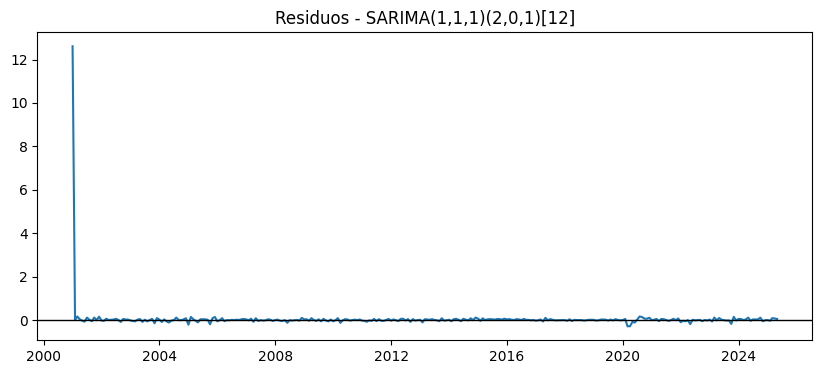

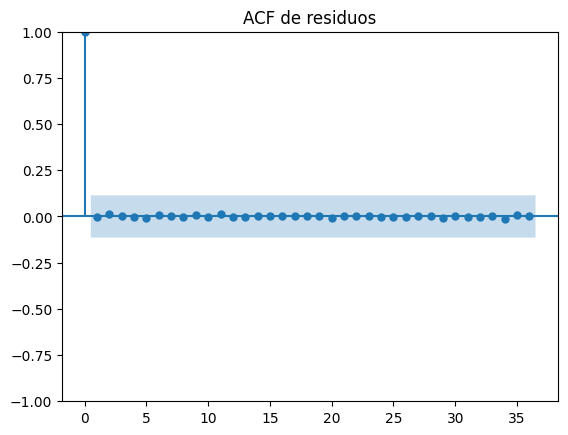

     lb_stat  lb_pvalue
12  0.169350        1.0
24  0.211502        1.0
36  0.319947        1.0


In [67]:
residuos = modelo_auto.resid()

plt.figure(figsize=(10,4))
plt.plot(residuos)
plt.title("Residuos - SARIMA(1,1,1)(2,0,1)[12]")
plt.axhline(0, color="black", lw=1)
plt.show()

plot_acf(residuos.dropna(), lags=36)
plt.title("ACF de residuos")
plt.show()

from statsmodels.stats.diagnostic import acorr_ljungbox

lb = acorr_ljungbox(residuos.dropna(), lags=[12, 24, 36], return_df=True)
print(lb)


- Residuos: sin tendencia.
- ACF: todos los puntos dentro de bandas
- Ljung–Box: p-valores > 0.05, por lo que no hay autocorrelación.

c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to co

  trend seasonal  damped           RMSE            MAE       MAPE      MASE  \
0   add      add   False   91872.412746   85419.215202  12.871885  2.320734   
5   mul      mul    True  139771.150360  126423.265580  18.839255  3.434764   
3   add      mul    True  149148.665412  134980.657420  20.113245  3.667257   
1   add      add    True  151366.213842  137000.195247  20.411283  3.722126   
4   mul      mul   False  179880.629176  162557.787125  24.208440  4.416494   
2   add      mul   False  284887.804292  237950.680276  36.677752  6.464826   

           AIC          BIC  
0  5285.365102  5342.150319  
5  5280.922388  5341.256681  
3  5280.211077  5340.545371  
1  5283.986120  5344.320413  
4  5285.799093  5342.584310  
2  7177.346788  7234.132006  
Mejor HW: {'trend': 'add', 'seasonal': 'add', 'damped': False}


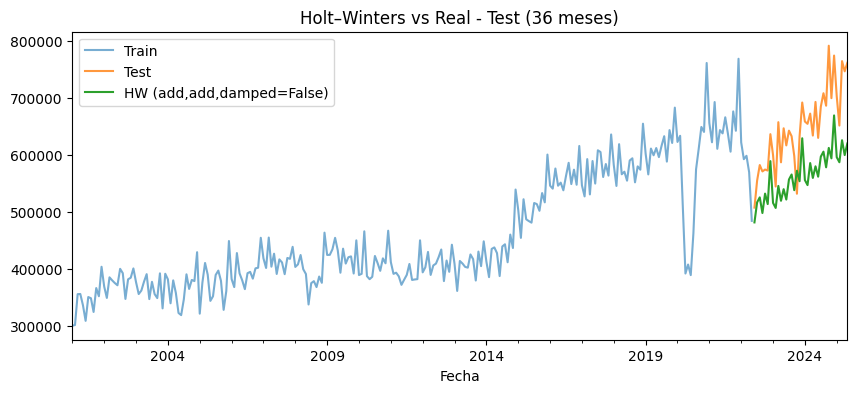

In [68]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ===== Helpers métricas =====
def mae(y, yhat): return np.mean(np.abs(y - yhat))
def rmse(y, yhat): return mean_squared_error(y, yhat, squared=False)
def mape(y, yhat): return np.mean(np.abs((y - yhat)/y)) * 100
def mase(y_true, y_pred, y_insample, m=12):
    ins = pd.Series(y_insample).dropna()
    d = np.abs(ins[m:].values - ins[:-m].values).mean()
    return np.abs(y_true - y_pred).mean() / d

# ===== Datos y split =====
y = superior_consumo.dropna().asfreq("MS")          # pd.Series mensual
H = 36                                           # horizonte test
y_tr, y_te = y.iloc[:-H], y.iloc[-H:]

# ===== Búsqueda pequeña de configuraciones ETS =====
configs = []
seasonal_periods = 12
positive = (y_tr.min() > 0)

cands = [
    ("add", "add", False),
    ("add", "add", True),
    ("add", "mul" if positive else "add", False),
    ("add", "mul" if positive else "add", True),
    ("mul" if positive else "add", "mul" if positive else "add", False),
    ("mul" if positive else "add", "mul" if positive else "add", True),
]

results = []
models = {}

for trend, seasonal, damped in cands:
    try:
        model = ExponentialSmoothing(
            y_tr, trend=trend, damped_trend=damped,
            seasonal=seasonal, seasonal_periods=seasonal_periods,
            initialization_method="estimated"
        ).fit(optimized=True, use_brute=True)
        # Pronóstico exactamente H pasos
        fc = model.forecast(H)
        # Métricas
        res = {
            "trend": trend, "seasonal": seasonal, "damped": damped,
            "RMSE": rmse(y_te.values, fc.values),
            "MAE":  mae(y_te.values, fc.values),
            "MAPE": mape(y_te.values, fc.values),
            "MASE": mase(y_te.values, fc.values, y_tr.values, m=12),
            "AIC": getattr(model, "aic", np.nan),
            "BIC": getattr(model, "bic", np.nan),
        }
        key = f"{trend}-{seasonal}-damped={damped}"
        models[key] = (model, fc)
        results.append(res)
    except Exception as e:
        # Algunos combos pueden fallar (datos no positivos con 'mul', etc.)
        # print(trend, seasonal, damped, "->", e)
        pass

tbl_hw = pd.DataFrame(results).sort_values(["RMSE","MASE"])
print(tbl_hw)

# ===== Mejor Holt–Winters por RMSE =====
best_key = tbl_hw.index[0]
best_cfg = tbl_hw.iloc[0][["trend","seasonal","damped"]].to_dict()
print("Mejor HW:", best_cfg.to_dict() if hasattr(best_cfg, "to_dict") else best_cfg)

# Gráfico comparativo
best_model, best_fc = models[list(models.keys())[0]]  # corregimos con la clave real
best_model, best_fc = models[[k for k in models.keys() if k.startswith(f"{best_cfg['trend']}-{best_cfg['seasonal']}-damped={best_cfg['damped']}")][0]]

plt.figure(figsize=(10,4))
y_tr.plot(label="Train", alpha=0.6)
y_te.plot(label="Test", alpha=0.8)
best_fc.plot(label=f"HW ({best_cfg['trend']},{best_cfg['seasonal']},damped={best_cfg['damped']})")
plt.title("Holt–Winters vs Real - Test (36 meses)")
plt.legend(); plt.show()


Con esta comparación, pareciera que el modelo de ARIMA está sobreajustado, haremos la prueba

In [69]:


y = superior_consumo.dropna().asfreq("MS")
H = 36  # ventana de evaluación (últimos 36 meses)

def walk_forward_1step(y, start_idx, fit_fn):
    preds, tr_values = [], []
    for t in range(start_idx, len(y)):
        train = y.iloc[:t]
        preds.append(fit_fn(train))
        tr_values.append(train.values)  # para MASE
    preds = pd.Series(preds, index=y.index[start_idx:])
    return preds

# --- Definiciones de modelos ---
def pred_sarima_complex(train):
    m = SARIMAX(train, order=(1,1,1), seasonal_order=(2,0,1,12),
                enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
    return m.forecast(1).iloc[0]

def pred_sarima_simple(train):
    # más parsimonioso para evitar overfit
    m = SARIMAX(train, order=(1,1,1), seasonal_order=(0,0,1,12),
                enforce_stationarity=True, enforce_invertibility=True).fit(disp=False)
    return m.forecast(1).iloc[0]

# Usa la mejor configuración HW que te salió (ajusta si fue distinta)
def pred_hw(train):
    m = ExponentialSmoothing(train, trend="add", seasonal="add",
                             seasonal_periods=12, initialization_method="estimated"
                             ).fit(optimized=True, use_brute=True)
    return m.forecast(1).iloc[0]

# --- Backtest en los últimos 36 meses ---
start_idx = len(y) - H
y_te = y.iloc[start_idx:]

pred_complex = walk_forward_1step(y, start_idx, pred_sarima_complex)
pred_simple  = walk_forward_1step(y, start_idx, pred_sarima_simple)
pred_hw      = walk_forward_1step(y, start_idx, pred_hw)

def eval_preds(y_true, y_pred, y_insample):
    return {
        "RMSE": rmse(y_true.values, y_pred.values),
        "MAE":  mae(y_true.values, y_pred.values),
        "MAPE": mape(y_true.values, y_pred.values),
        "MASE": mase(y_true.values, y_pred.values, y_insample.values, m=12),
    }

res_complex = eval_preds(y_te, pred_complex, y.iloc[:start_idx])
res_simple  = eval_preds(y_te, pred_simple,  y.iloc[:start_idx])
res_hw      = eval_preds(y_te, pred_hw,      y.iloc[:start_idx])

tbl = pd.DataFrame([res_complex, res_simple, res_hw],
                   index=["SARIMA(1,1,1)(2,0,1)[12]", "SARIMA(1,1,1)(0,0,1)[12]", "Holt-Winters(add,add)"])
print(tbl.sort_values("RMSE"))



c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to co

                                  RMSE           MAE      MAPE      MASE
Holt-Winters(add,add)     39825.495797  31159.969225  4.882073  0.846578
SARIMA(1,1,1)(2,0,1)[12]  45782.313466  34333.194270  5.299410  0.932790
SARIMA(1,1,1)(0,0,1)[12]  51401.959110  40547.329552  6.211916  1.101621


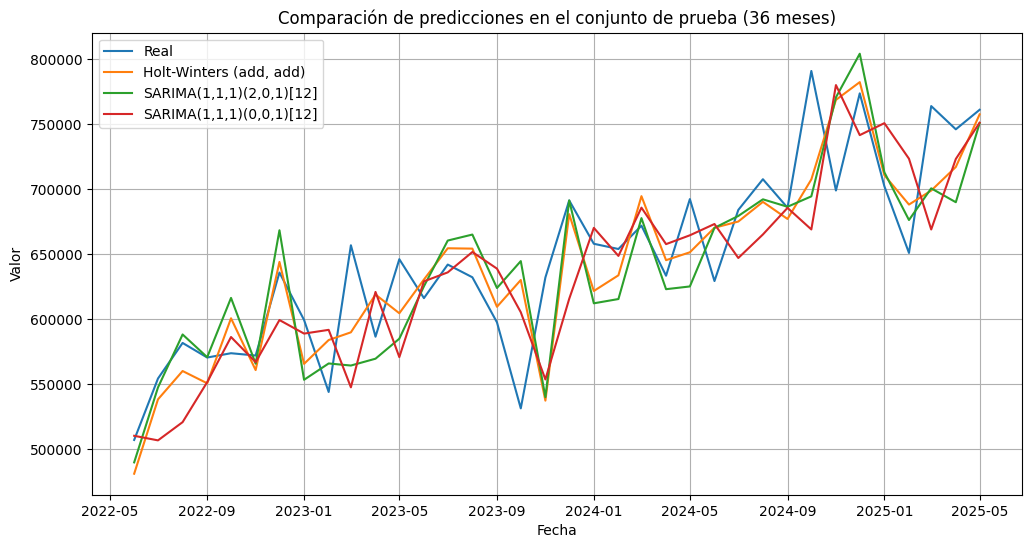

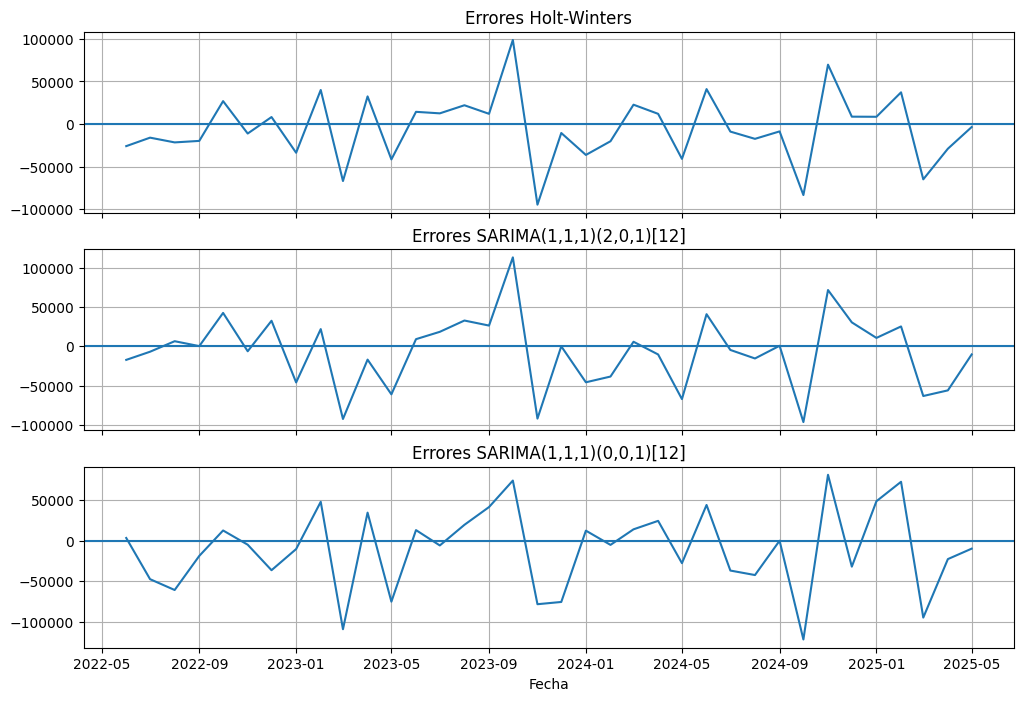

In [70]:
import matplotlib.pyplot as plt

# Asegurar alineación 1:1 con el índice de test
y_test = y_te.copy()
y_pred_hw      = pred_hw.reindex(y_test.index)
y_pred_sarima1 = pred_complex.reindex(y_test.index)   # SARIMA(1,1,1)(2,0,1)[12]
y_pred_sarima2 = pred_simple.reindex(y_test.index)    # SARIMA(1,1,1)(0,0,1)[12]

# --- Gráfico 1: todos juntos ---
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Real")
plt.plot(y_pred_hw.index, y_pred_hw, label="Holt-Winters (add, add)")
plt.plot(y_pred_sarima1.index, y_pred_sarima1, label="SARIMA(1,1,1)(2,0,1)[12]")
plt.plot(y_pred_sarima2.index, y_pred_sarima2, label="SARIMA(1,1,1)(0,0,1)[12]")
plt.title("Comparación de predicciones en el conjunto de prueba (36 meses)")
plt.xlabel("Fecha"); plt.ylabel("Valor"); plt.legend(); plt.grid(True)
plt.show()

# --- Gráfico 2: errores (pred - real) por modelo ---
fig, ax = plt.subplots(3, 1, figsize=(12,8), sharex=True)
ax[0].plot(y_test.index, (y_pred_hw - y_test));      ax[0].set_title("Errores Holt-Winters")
ax[1].plot(y_test.index, (y_pred_sarima1 - y_test)); ax[1].set_title("Errores SARIMA(1,1,1)(2,0,1)[12]")
ax[2].plot(y_test.index, (y_pred_sarima2 - y_test)); ax[2].set_title("Errores SARIMA(1,1,1)(0,0,1)[12]")
for a in ax: a.axhline(0); a.grid(True)
plt.xlabel("Fecha"); plt.show()


El Holt-Winters funciona mejor que el modelo SARIMA(1,1,1)(2,0,1)[12], el mejor modelo ARIMA

#### 2.3 Precios del Diesel

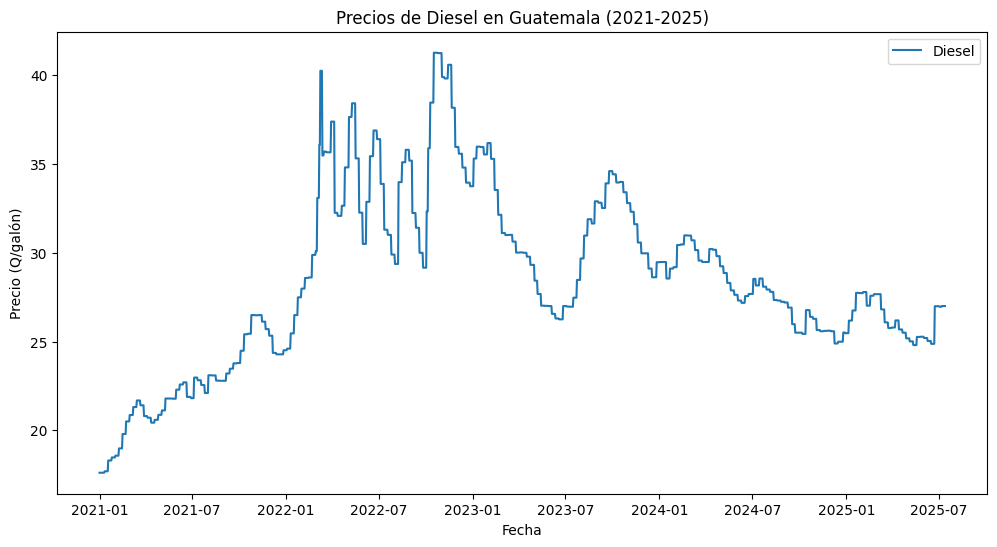

In [71]:
# Graficar de PRECIOS del combustible DIESEL
precios['FECHA'] = pd.to_datetime(precios['FECHA'])
diesel_precios = precios['Diesel']
diesel_precios.index = precios['FECHA']
plt.figure(figsize=(12, 6))
plt.plot(diesel_precios.index, diesel_precios, label='Diesel')
plt.title("Precios de Diesel en Guatemala (2021-2025)")
plt.xlabel("Fecha")
plt.ylabel("Precio (Q/galón)")   
plt.legend()
plt.show()

- No hay una tendencia clara creciente o decreciente, pero la media tampoco pareciera estacionaria.
- La estacionalidad no es evidente, sin embargo hay claros picos y valles que hay que determinar cada cuánto se replican.

##### Descomposición

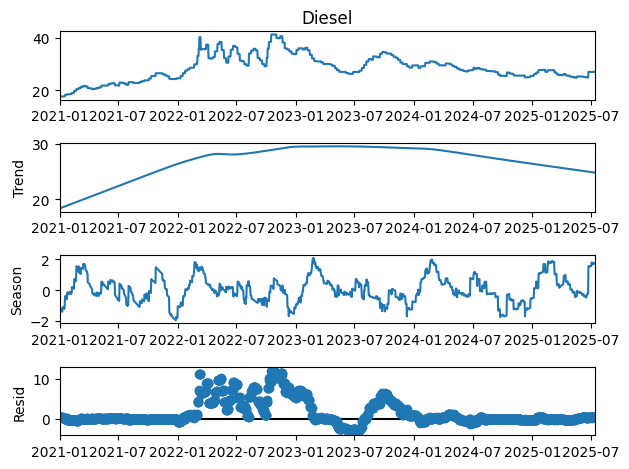

In [72]:
from statsmodels.tsa.seasonal import STL

res = STL(diesel_precios.dropna(), period=365, robust=True).fit()
res.plot()
plt.show()


- **Tendencia**: Sube en 2021-2022, se estabiliza en 2023 y luego baja en 2024-2025
- **Estacionalidad:** Se repite anualmente con picos y valles claros.
- **Residuos**: Gran volatilidad en 2022 y 2023, cuando hay shocks extremos.

##### Desviación Móvil

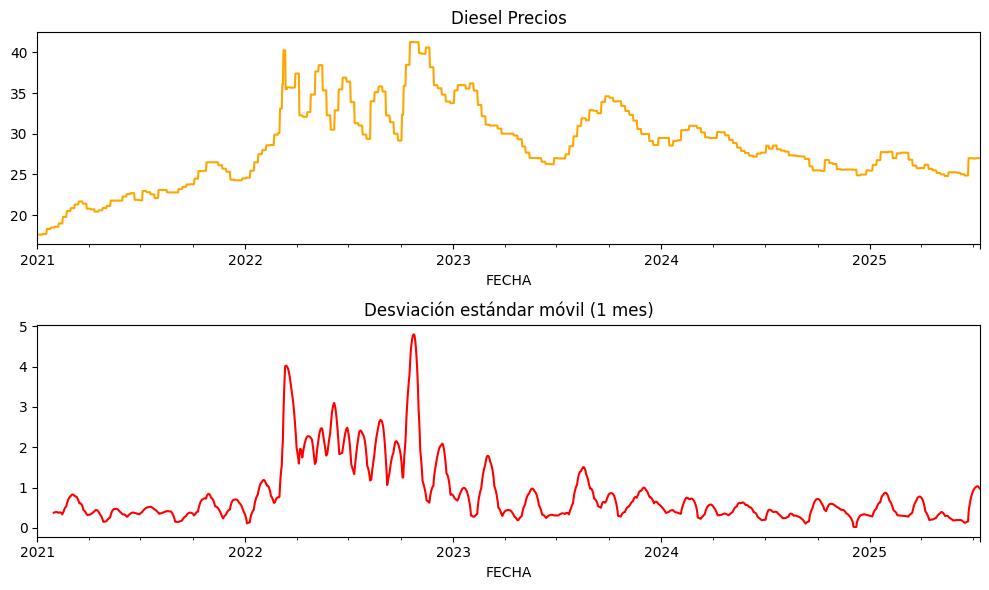

In [73]:
desvMovil = diesel_precios.rolling(window=30).std()

fig, ax = plt.subplots(2, 1, figsize=(10,6))
diesel_precios.plot(ax=ax[0], color="orange", title="Diesel Precios")
desvMovil.plot(ax=ax[1], color="red", title="Desviación estándar móvil (1 mes)")
plt.tight_layout()
plt.show()

La desviación estándar móvil no muestra una tendencia sostenida, tiene picos atípicos asociados a eventos externos. Podemos clasificar dos épocas importantes: de 2022 a inicios de 2023, en el que la volatilidad es de 4Q/galón, lo cual es muy alto para el mercado de combustibles; y el resto del tiempo, donde la volatilidad es baja.

Deberá realizarse una transformación que tome en cuenta esta volatilidad

##### Estacionariedad de media

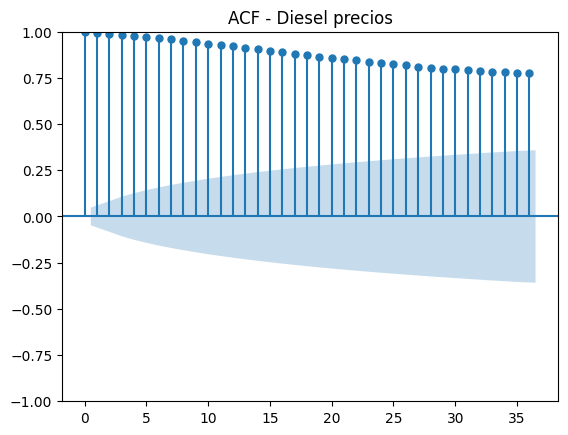

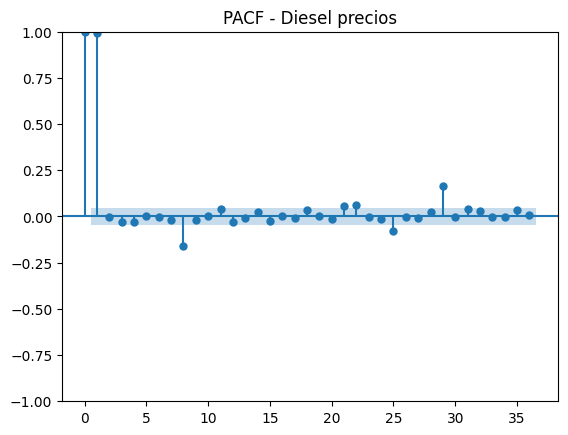

ADF: estadístico=-2.741, p-valor=0.067


In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# ACF y PACF
plot_acf(diesel_precios.dropna(), lags=36)
plt.title("ACF - Diesel precios")
plt.show()

plot_pacf(diesel_precios.dropna(), lags=36, method="ywm")
plt.title("PACF - Diesel precios")
plt.show()

# Prueba ADF
stat, pval, lags, nobs, _, _ = adfuller(diesel_precios.dropna(), autolag="AIC")
print(f"ADF: estadístico={stat:.3f}, p-valor={pval:.3f}")


Podemos confirmar que la media no es estacionaria, ya que la serie tiene una tendencia creciente antes de 2013 y decreciente después. La prueba ADF muestra un p-valor 0.97 mayor a 0.05, lo que indica que no podemos rechazar la hipótesis nula de que la serie es no estacionaria.

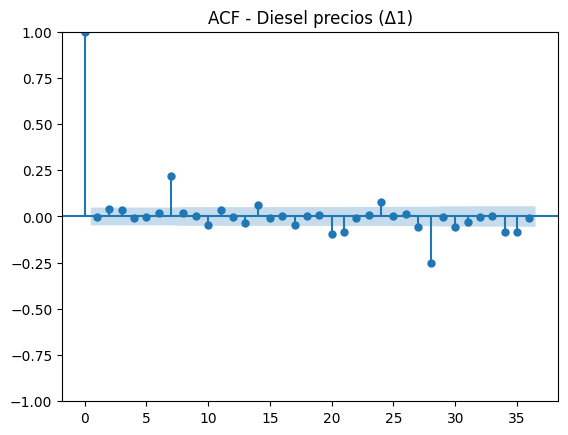

ADF Δ1: estadístico=-8.064, p-valor=0.000


In [75]:
serie_d1 = diesel_precios.diff()

plot_acf(serie_d1.dropna(), lags=36)
plt.title("ACF - Diesel precios (Δ1)")
plt.show()

stat_d1, pval_d1, *_ = adfuller(serie_d1.dropna(), autolag="AIC")
print(f"ADF Δ1: estadístico={stat_d1:.3f}, p-valor={pval_d1:.3f}")


Podemos observar que con la primera diferenciación, la cola larga desaparece y ya tenemos estacionariedad en media.

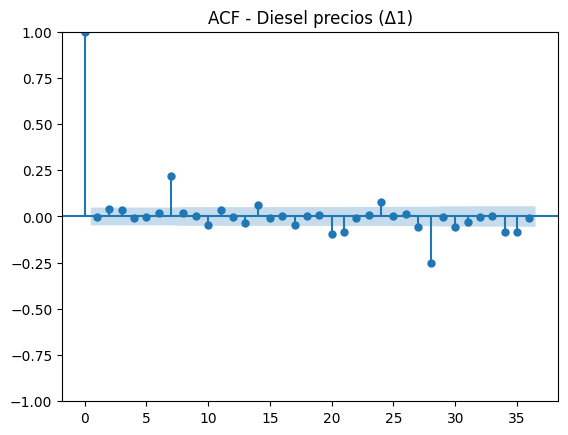

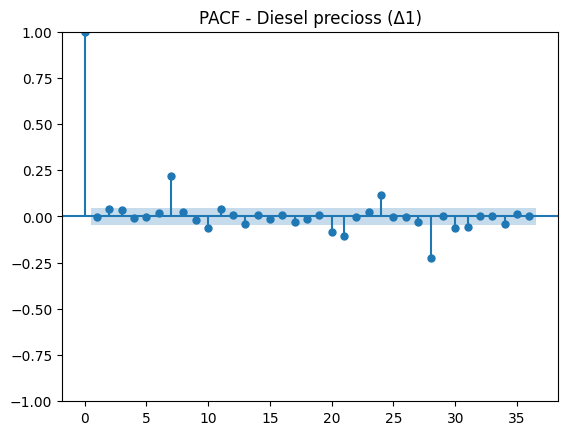

In [76]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF y PACF para elegir p y q iniciales
plot_acf(serie_d1.dropna(), lags=36)
plt.title("ACF - Diesel precios (Δ1)")
plt.show()

plot_pacf(serie_d1.dropna(), lags=36, method="ywm")
plt.title("PACF - Diesel precioss (Δ1)")
plt.show()


##### Modelo ARIMA

- d=1: porque luego de una diferencia se estabiliza la ACF
- No hay señales fuertes de autocorrelación prolongada
- No se ven picos claros en múltiplos de 7 por lo que la estacionalidad semanal no parece ser muy marcada


Candidatos:

ARIMA(0,1,0)
ARIMA(1,1,0)
ARIMA(0,1,1)
ARIMA(1,1,1)

                     modelo          AIC          BIC
3  (1, 1, 1) x (0, 0, 0, 7)  1896.940109  1913.172964
0  (0, 1, 0) x (0, 0, 0, 7)  1900.275432  1905.686384
1  (1, 1, 0) x (0, 0, 0, 7)  1902.275432  1913.097336
2  (0, 1, 1) x (0, 0, 0, 7)  1902.275432  1913.097336


Text(0.5, 1.0, 'Residuos (1, 1, 1) x (0, 0, 0, 7)')

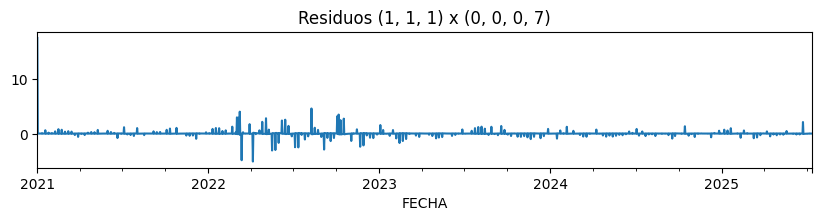

In [77]:
y = diesel_precios.dropna().asfreq("D").ffill()   # <-- TU serie de precios diarios

def fit_sarima(order, seas=(0,0,0,7)):
    m = SARIMAX(y, order=order, seasonal_order=seas,
                enforce_stationarity=True, enforce_invertibility=True)
    r = m.fit(disp=False)
    return r

# 2) Candidatos no estacionales (d=1).
cands = [
    ((0,1,0),(0,0,0,7)),  # random walk
    ((1,1,0),(0,0,0,7)),
    ((0,1,1),(0,0,0,7)),
    ((1,1,1),(0,0,0,7)),
]

res_objs, rows = {}, []
for o, s in cands:
    res = fit_sarima(o, s)
    key = f"{o} x {s}"
    res_objs[key] = res
    rows.append([key, res.aic, res.bic])

tabla = pd.DataFrame(rows, columns=["modelo","AIC","BIC"]).sort_values("AIC")
print(tabla)

# 3) Diagnóstico del mejor por AIC
best_key = tabla.iloc[0,0]
best = res_objs[best_key]
resid = best.resid.dropna()

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(311); resid.plot(ax=ax1); ax1.set_title(f"Residuos {best_key}")


El mejor modelo es ARIMA(1,1,1) sin estacionalidad semanal porque tiene los menores valores de AIC y BIC.

A continuación haremos la prueba con autoarima para verificar que es el mejor modelo.

In [78]:

model_auto =auto_arima(
    y.asfreq("D").ffill(),
    seasonal=False,
    start_p=0, max_p=4, start_q=0, max_q=4,
    d=None, stepwise=True, trace=True, information_criterion="aic"
)



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1901.986, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1903.986, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1903.986, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1900.275, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1898.769, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1897.447, Time=0.85 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1903.243, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1897.017, Time=1.88 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1903.160, Time=0.34 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1907.069, Time=0.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1876.023, Time=1.72 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1874.131, Time=2.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1897.391, Time=1.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1876.106, Time=2.98 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept

In [79]:
y_w = y.asfreq("D").ffill().resample("W-MON").mean()
model_auto = auto_arima(
    y_w,
    seasonal=True, m=52,         # 52 semanas ≈ 1 año
    start_p=0, max_p=3, start_q=0, max_q=3,
    start_P=0, max_P=2, start_Q=0, max_Q=2,
    max_order=10, stepwise=True, trace=True, information_criterion="aic"
)
print(model_auto.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=716.489, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=685.550, Time=0.53 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=679.398, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=714.801, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=677.408, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=679.397, Time=0.62 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=2.19 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=679.394, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=679.397, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=683.567, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=677.238, Time=0.21 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=679.227, Time=2.00 sec
 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=679.228, Time=2.08 sec
 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=4.76 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AI

Es mejor seleccionar el segundo modelo, en el que se consideran los precios semanales y una estacionalidad anual: ARIMA(3,1,3)(0,0,0)[52], pues es el que presenta un menor AIC

NO SE REALIZARÁ COMPARACIÓN CON **PROPHET** POR PROBLEMAS DE INSTALACIÓN

Se optará por realizar de nuevo la comparación con Holt-WInters

In [80]:
H = 36  # ventana de evaluación (últimos 36 meses)

def walk_forward_1step(y, start_idx, fit_fn):
    preds, tr_values = [], []
    for t in range(start_idx, len(y)):
        train = y.iloc[:t]
        preds.append(fit_fn(train))
        tr_values.append(train.values)  # para MASE
    preds = pd.Series(preds, index=y.index[start_idx:])
    return preds

# --- Definiciones de modelos ---
def pred_sarima_complex(train):
    m = SARIMAX(train, order=(3,1,3), seasonal_order=(0,0,0,52),
                enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
    return m.forecast(1).iloc[0]


# Usa la mejor configuración HW que te salió (ajusta si fue distinta)
def pred_hw(train):
    m = ExponentialSmoothing(train, trend="add", seasonal="add",
                             seasonal_periods=12, initialization_method="estimated"
                             ).fit(optimized=True, use_brute=True)
    return m.forecast(1).iloc[0]

# --- Backtest en los últimos 36 meses ---
start_idx = len(y) - H
y_te = y.iloc[start_idx:]

pred_complex = walk_forward_1step(y, start_idx, pred_sarima_complex)
pred_hw      = walk_forward_1step(y, start_idx, pred_hw)

def eval_preds(y_true, y_pred, y_insample):
    return {
        "RMSE": rmse(y_true.values, y_pred.values),
        "MAE":  mae(y_true.values, y_pred.values),
        "MAPE": mape(y_true.values, y_pred.values),
        "MASE": mase(y_true.values, y_pred.values, y_insample.values, m=12),
    }

res_complex = eval_preds(y_te, pred_complex, y.iloc[:start_idx])
res_hw      = eval_preds(y_te, pred_hw,      y.iloc[:start_idx])

tbl = pd.DataFrame([res_complex, res_hw],
                   index=["SARIMA(3,1,3)(0,0,0)[52]", "Holt-Winters(add,add)"])
print(tbl.sort_values("RMSE"))



c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jpcor\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

                              RMSE       MAE      MAPE      MASE
Holt-Winters(add,add)     0.357246  0.097054  0.365421  0.090056
SARIMA(3,1,3)(0,0,0)[52]  0.360431  0.098184  0.367306  0.091104


El Holt-Winters es un mejor modelo para predecir series de tiempo que el ARIMA

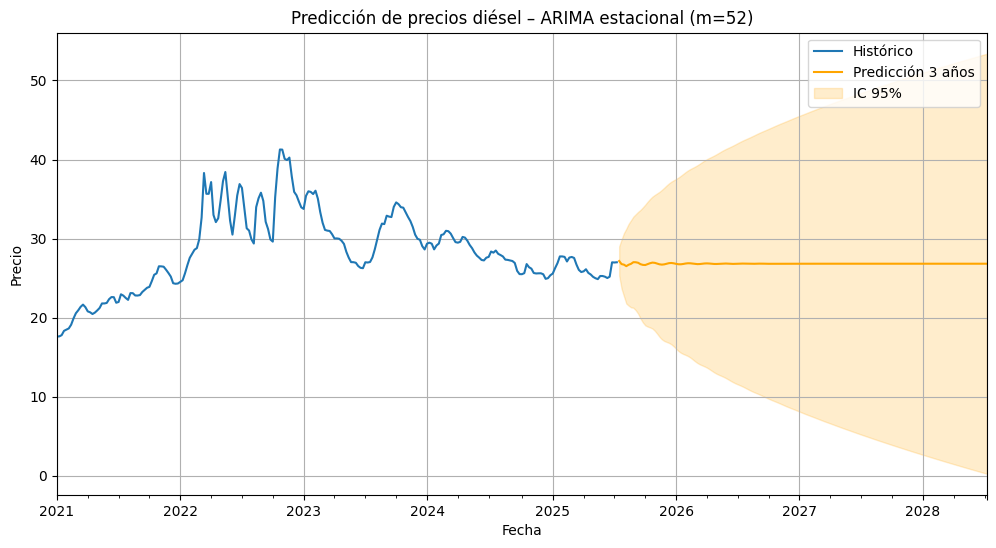

In [81]:


# Serie semanal (asegúrate que diesel_precios es tu serie original diaria)
y_day = diesel_precios.dropna().asfreq("D").ffill()
y_w = y_day.resample("W-MON").mean()

# Entrenar ARIMA estacional (m=52) con todos los datos
model_arimaB = auto_arima(
    y_w, seasonal=True, m=52,
    start_p=0, max_p=3, start_q=0, max_q=3,
    start_P=0, max_P=1, start_Q=0, max_Q=1,
    d=None, D=None, stepwise=True,
    error_action="ignore", suppress_warnings=True
)

# Forecast 3 años = 156 semanas
n_steps = 156
forecast, conf_int = model_arimaB.predict(
    n_periods=n_steps, return_conf_int=True
)

# Índice de fechas para el forecast
future_idx = pd.date_range(
    start=y_w.index[-1] + pd.Timedelta(weeks=1),
    periods=n_steps, freq="W-MON"
)
forecast_series = pd.Series(forecast, index=future_idx)

# Mostrar y graficar
plt.figure(figsize=(12,6))
y_w.plot(label="Histórico")
forecast_series.plot(label="Predicción 3 años", color="orange")
plt.fill_between(future_idx, conf_int[:,0], conf_int[:,1], 
                 color="orange", alpha=0.2, label="IC 95%")
plt.title("Predicción de precios diésel – ARIMA estacional (m=52)")
plt.xlabel("Fecha"); plt.ylabel("Precio"); plt.grid(True); plt.legend(); plt.show()

# Resultados en DataFrame
pred_df = pd.DataFrame({
    "Forecast": forecast,
    "IC_inf": conf_int[:,0],
    "IC_sup": conf_int[:,1]
}, index=future_idx)

Esta serie NO es apropiada para predecir precios del diesel a futuro. Esto se debe principalmente porque los precios estuvieron fuertmente afectados por factores externos que no son tomados en cuenta en la estacionalidad y tendencia.

#### Cómo afectan factores externos a las series

Durante la pandemia, las series de importación, consumo y precios de combustibles mostraron datos atípicos y una ruptura marcada por muy alta volatilidad. Estos quiebres afectaron la capacidad predictiva de todos los modelos, por lo que podemos notar que las predicciones no son apropiadas. 

Por otro lado, la guerra de Rusia y Ucrania desde 2022 generó un nuevo shock en los precios de hidrocarburos. Presionando los precios, los volumenes de importación y consumo. Este segundo evento externo también puede observarse claramente en las series como algo que saca de la ordinariedad de la estacionalidad y la tendencia de los combustibles.